# ECE 498 DS Mini Project 2 - Checkpoint 1

$
\textbf{Group members (all registered):}\\ \ \\
\text{Boyang Zhou (NetID: boyangz3)}\\
\text{Chuhao Feng (NetID: chuhaof2)}\\
\text{Mengxuan Yu (NetID: my13)}\\ 
$

In [1]:
# import necessary module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn as skl

In [2]:
# adjust format
sns.set()

# Task 1: Data Cleaning and Visual Inspection

## 0. Getting Started With the Data

### 1. 

### 2. 

### 3. 

## 1. Bayesian Network for Quality Control

### a. Joint Probability Factorization

### b. Parameters Required

### c. Constructing Probability Tables

### d. Final Probability Tables

In [3]:
# import QualityControl.csv as qual_con
qual_con = pd.read_csv('QualityControl.csv')

In [4]:
# calculate P(Quality|Storage Temp, Collection Method, Lab Time)
P_pos_Q_SCL = qual_con.groupby(['strtmp','coll','labtime','qual']).size() / qual_con.groupby(['strtmp','coll','labtime']).size()

In [5]:
# generate Table of P(Quality|Storage Temp, Collection Method, Lab Time)
strtmp = ['cold','cold','cold','cold',
          'cool','cool','cool','cool']
coll = ['nurse','nurse','patient','patient',
        'nurse','nurse','patient','patient']
labtime = ['long','short','long','short',
           'long','short','long','short']
conditions = ['(cold,nurse,long)','(cold,nurse,short)','(cold,patient,long)','(cold,patient,short)',
              '(cool,nurse,long)','(cool,nurse,short)','(cool,patient,long)','(cool,patient,short)']
goods = [P_pos_Q_SCL.iloc[1],P_pos_Q_SCL.iloc[3],P_pos_Q_SCL.iloc[5],P_pos_Q_SCL.iloc[7],
         P_pos_Q_SCL.iloc[9],P_pos_Q_SCL.iloc[11],P_pos_Q_SCL.iloc[13],P_pos_Q_SCL.iloc[15]]
bads = [P_pos_Q_SCL.iloc[0],P_pos_Q_SCL.iloc[2],P_pos_Q_SCL.iloc[4],P_pos_Q_SCL.iloc[6],
        P_pos_Q_SCL.iloc[8],P_pos_Q_SCL.iloc[10],P_pos_Q_SCL.iloc[12],P_pos_Q_SCL.iloc[14]]
table_P_pos = pd.DataFrame({"Storage Temp": strtmp, "Collection Method": coll, "Lab Time": labtime,"Good": goods, "Bad": bads})

print("Table of P(Quality|Storage Temp, Collection Method, Lab Time)")
table_P_pos

Table of P(Quality|Storage Temp, Collection Method, Lab Time)


Storage Temp Collection Method Lab Time      Good       Bad
0         cold             nurse     long  0.887962  0.112038
1         cold             nurse    short  0.955112  0.044888
2         cold           patient     long  0.862069  0.137931
3         cold           patient    short  0.943978  0.056022
4         cool             nurse     long  0.822785  0.177215
5         cool             nurse    short  0.972376  0.027624
6         cool           patient     long  0.117647  0.882353
7         cool           patient    short  0.960784  0.039216

### e. Cleaning the dataset

In [6]:
# import BayesInferenceHE0.csv as BI_HE0
BI_HE0 = pd.read_csv('BayesInferenceHE0.csv')
# import BayesInferenceHE1.csv as BI_HE1
BI_HE1 = pd.read_csv('BayesInferenceHE1.csv')

In [7]:
# determine the quality for HE0
bad_sample_HE0 = []
for i in range(BI_HE0.shape[0]):
    if BI_HE0.iloc[i,1] == "cool" and BI_HE0.iloc[i,2] == "patient" and BI_HE0.iloc[i,3] == "long":
        # the only bad samples according to the calculated conditional probability
        bad_sample_HE0.append(BI_HE0.iloc[i,0])

print("Samples for HE0\n")
print("Bad samples:\n", bad_sample_HE0)
print("\nTotal number of bad samples dropped:", len(bad_sample_HE0))

Samples for HE0

Bad samples:
 ['HE0Sample_699', 'HE0Sample_700', 'HE0Sample_701', 'HE0Sample_702', 'HE0Sample_703', 'HE0Sample_704', 'HE0Sample_705', 'HE0Sample_706', 'HE0Sample_707', 'HE0Sample_708', 'HE0Sample_709', 'HE0Sample_710', 'HE0Sample_711', 'HE0Sample_712', 'HE0Sample_713', 'HE0Sample_714', 'HE0Sample_715', 'HE0Sample_716', 'HE0Sample_717', 'HE0Sample_718', 'HE0Sample_719', 'HE0Sample_720', 'HE0Sample_721', 'HE0Sample_722', 'HE0Sample_723', 'HE0Sample_724', 'HE0Sample_725', 'HE0Sample_726', 'HE0Sample_727', 'HE0Sample_728', 'HE0Sample_729', 'HE0Sample_730', 'HE0Sample_731', 'HE0Sample_732', 'HE0Sample_733', 'HE0Sample_734', 'HE0Sample_735', 'HE0Sample_736', 'HE0Sample_737', 'HE0Sample_738', 'HE0Sample_739', 'HE0Sample_740', 'HE0Sample_741', 'HE0Sample_742', 'HE0Sample_743', 'HE0Sample_744', 'HE0Sample_745', 'HE0Sample_746', 'HE0Sample_747', 'HE0Sample_748', 'HE0Sample_749', 'HE0Sample_750', 'HE0Sample_751', 'HE0Sample_752', 'HE0Sample_753', 'HE0Sample_754', 'HE0Sample_755',

In [8]:
# determine the quality for HE1
bad_sample_HE1 = []
for i in range(BI_HE1.shape[0]):
    if BI_HE1.iloc[i,1] == "cool" and BI_HE1.iloc[i,2] == "patient" and BI_HE1.iloc[i,3] == "long":
        # the only bad samples according to the calculated conditional probability
        bad_sample_HE1.append(BI_HE1.iloc[i,0])

print("Samples for HE1\n")
print("Bad samples:\n", bad_sample_HE1)
print("\nTotal number of bad samples dropped:", len(bad_sample_HE1))

Samples for HE1

Bad samples:
 ['HE1Sample_699', 'HE1Sample_700', 'HE1Sample_701', 'HE1Sample_702', 'HE1Sample_703', 'HE1Sample_704', 'HE1Sample_705', 'HE1Sample_706', 'HE1Sample_707', 'HE1Sample_708', 'HE1Sample_709', 'HE1Sample_710', 'HE1Sample_711', 'HE1Sample_712', 'HE1Sample_713', 'HE1Sample_714', 'HE1Sample_715', 'HE1Sample_716', 'HE1Sample_717', 'HE1Sample_718', 'HE1Sample_719', 'HE1Sample_720', 'HE1Sample_721', 'HE1Sample_722', 'HE1Sample_723', 'HE1Sample_724', 'HE1Sample_725', 'HE1Sample_726', 'HE1Sample_727', 'HE1Sample_728', 'HE1Sample_729', 'HE1Sample_730', 'HE1Sample_731', 'HE1Sample_732', 'HE1Sample_733', 'HE1Sample_734', 'HE1Sample_735', 'HE1Sample_736', 'HE1Sample_737', 'HE1Sample_738', 'HE1Sample_739', 'HE1Sample_740', 'HE1Sample_741', 'HE1Sample_742', 'HE1Sample_743', 'HE1Sample_744', 'HE1Sample_745', 'HE1Sample_746', 'HE1Sample_747', 'HE1Sample_748', 'HE1Sample_749', 'HE1Sample_750', 'HE1Sample_751', 'HE1Sample_752', 'HE1Sample_753', 'HE1Sample_754', 'HE1Sample_755',

In [9]:
# *******************TEMPORARY***********************
data_HE0 = pd.read_csv('RelativeAbundance_HE0.csv')
data_HE1 = pd.read_csv('RelativeAbundance_HE1.csv')

In [10]:
data_HE0.set_index("Microbe Name", inplace = True)
data_HE1.set_index("Microbe Name", inplace = True)

In [11]:
# drop bad quality samples
data_g_HE0 = data_HE0.drop(bad_sample_HE0, axis = 1)
data_g_HE1 = data_HE1.drop(bad_sample_HE1, axis = 1)

## 2. Data Standardization

### 1. Verify Relative Abundance

In [12]:
# determine if provided with relative abundance data for HE0
sample_N = data_g_HE0.columns
not_re_sample_HE0 = []
for i in range(1, data_g_HE0.shape[1]):
    if np.sum(data_g_HE0.iloc[:,i]) != 1.0:
        # the only bad samples according to the calculated conditional probability
        not_re_sample_HE0.append(sample_N[i])

print("Samples for HE0\n")
print("Non-relative-abundance samples:\n", not_re_sample_HE0)
print("\nTotal number of non-relative-abundance samples dropped:", len(not_re_sample_HE0))

Samples for HE0

Non-relative-abundance samples:
 ['HE0Sample_13', 'HE0Sample_17', 'HE0Sample_25', 'HE0Sample_30', 'HE0Sample_37', 'HE0Sample_43', 'HE0Sample_44', 'HE0Sample_54', 'HE0Sample_59', 'HE0Sample_64', 'HE0Sample_66', 'HE0Sample_71', 'HE0Sample_74', 'HE0Sample_77', 'HE0Sample_89', 'HE0Sample_95', 'HE0Sample_97', 'HE0Sample_99', 'HE0Sample_102', 'HE0Sample_115', 'HE0Sample_125', 'HE0Sample_130', 'HE0Sample_132', 'HE0Sample_135', 'HE0Sample_145', 'HE0Sample_147', 'HE0Sample_157', 'HE0Sample_165', 'HE0Sample_168', 'HE0Sample_170', 'HE0Sample_175', 'HE0Sample_187', 'HE0Sample_218', 'HE0Sample_228', 'HE0Sample_229', 'HE0Sample_235', 'HE0Sample_238', 'HE0Sample_253', 'HE0Sample_254', 'HE0Sample_257', 'HE0Sample_279', 'HE0Sample_284', 'HE0Sample_286', 'HE0Sample_287', 'HE0Sample_288', 'HE0Sample_302', 'HE0Sample_304', 'HE0Sample_306', 'HE0Sample_324', 'HE0Sample_336', 'HE0Sample_337', 'HE0Sample_338', 'HE0Sample_340', 'HE0Sample_349', 'HE0Sample_351', 'HE0Sample_353', 'HE0Sample_357'

In [13]:
# determine if provided with relative abundance data for HE1
sample_N = data_g_HE1.columns
not_re_sample_HE1 = []
for i in range(1, data_g_HE1.shape[1]):
    if np.sum(data_g_HE1.iloc[:,i]) != 1.0:
        # the only bad samples according to the calculated conditional probability
        not_re_sample_HE1.append(sample_N[i])

print("Samples for HE1\n")
print("Non-relative-abundance samples:\n", not_re_sample_HE1)
print("\nTotal number of non-relative-abundance samples dropped:", len(not_re_sample_HE1))

Samples for HE1

Non-relative-abundance samples:
 ['HE1Sample_2', 'HE1Sample_17', 'HE1Sample_18', 'HE1Sample_25', 'HE1Sample_28', 'HE1Sample_30', 'HE1Sample_37', 'HE1Sample_51', 'HE1Sample_62', 'HE1Sample_67', 'HE1Sample_84', 'HE1Sample_106', 'HE1Sample_108', 'HE1Sample_109', 'HE1Sample_111', 'HE1Sample_115', 'HE1Sample_117', 'HE1Sample_125', 'HE1Sample_128', 'HE1Sample_133', 'HE1Sample_154', 'HE1Sample_173', 'HE1Sample_189', 'HE1Sample_197', 'HE1Sample_209', 'HE1Sample_231', 'HE1Sample_232', 'HE1Sample_235', 'HE1Sample_238', 'HE1Sample_239', 'HE1Sample_241', 'HE1Sample_242', 'HE1Sample_247', 'HE1Sample_249', 'HE1Sample_264', 'HE1Sample_278', 'HE1Sample_285', 'HE1Sample_296', 'HE1Sample_305', 'HE1Sample_309', 'HE1Sample_320', 'HE1Sample_321', 'HE1Sample_325', 'HE1Sample_326', 'HE1Sample_328', 'HE1Sample_329', 'HE1Sample_332', 'HE1Sample_334', 'HE1Sample_339', 'HE1Sample_346', 'HE1Sample_351', 'HE1Sample_356', 'HE1Sample_361', 'HE1Sample_372', 'HE1Sample_373', 'HE1Sample_377', 'HE1Sampl

In [14]:
# drop non-relative-abundance samples
data_gn_HE0 = data_g_HE0.drop(not_re_sample_HE0, axis = 1)
data_gn_HE1 = data_g_HE1.drop(not_re_sample_HE1, axis = 1)

### 2. Discussion on Relative Abundance Data

## 3. Visual Inspection

Heatmap for HE0


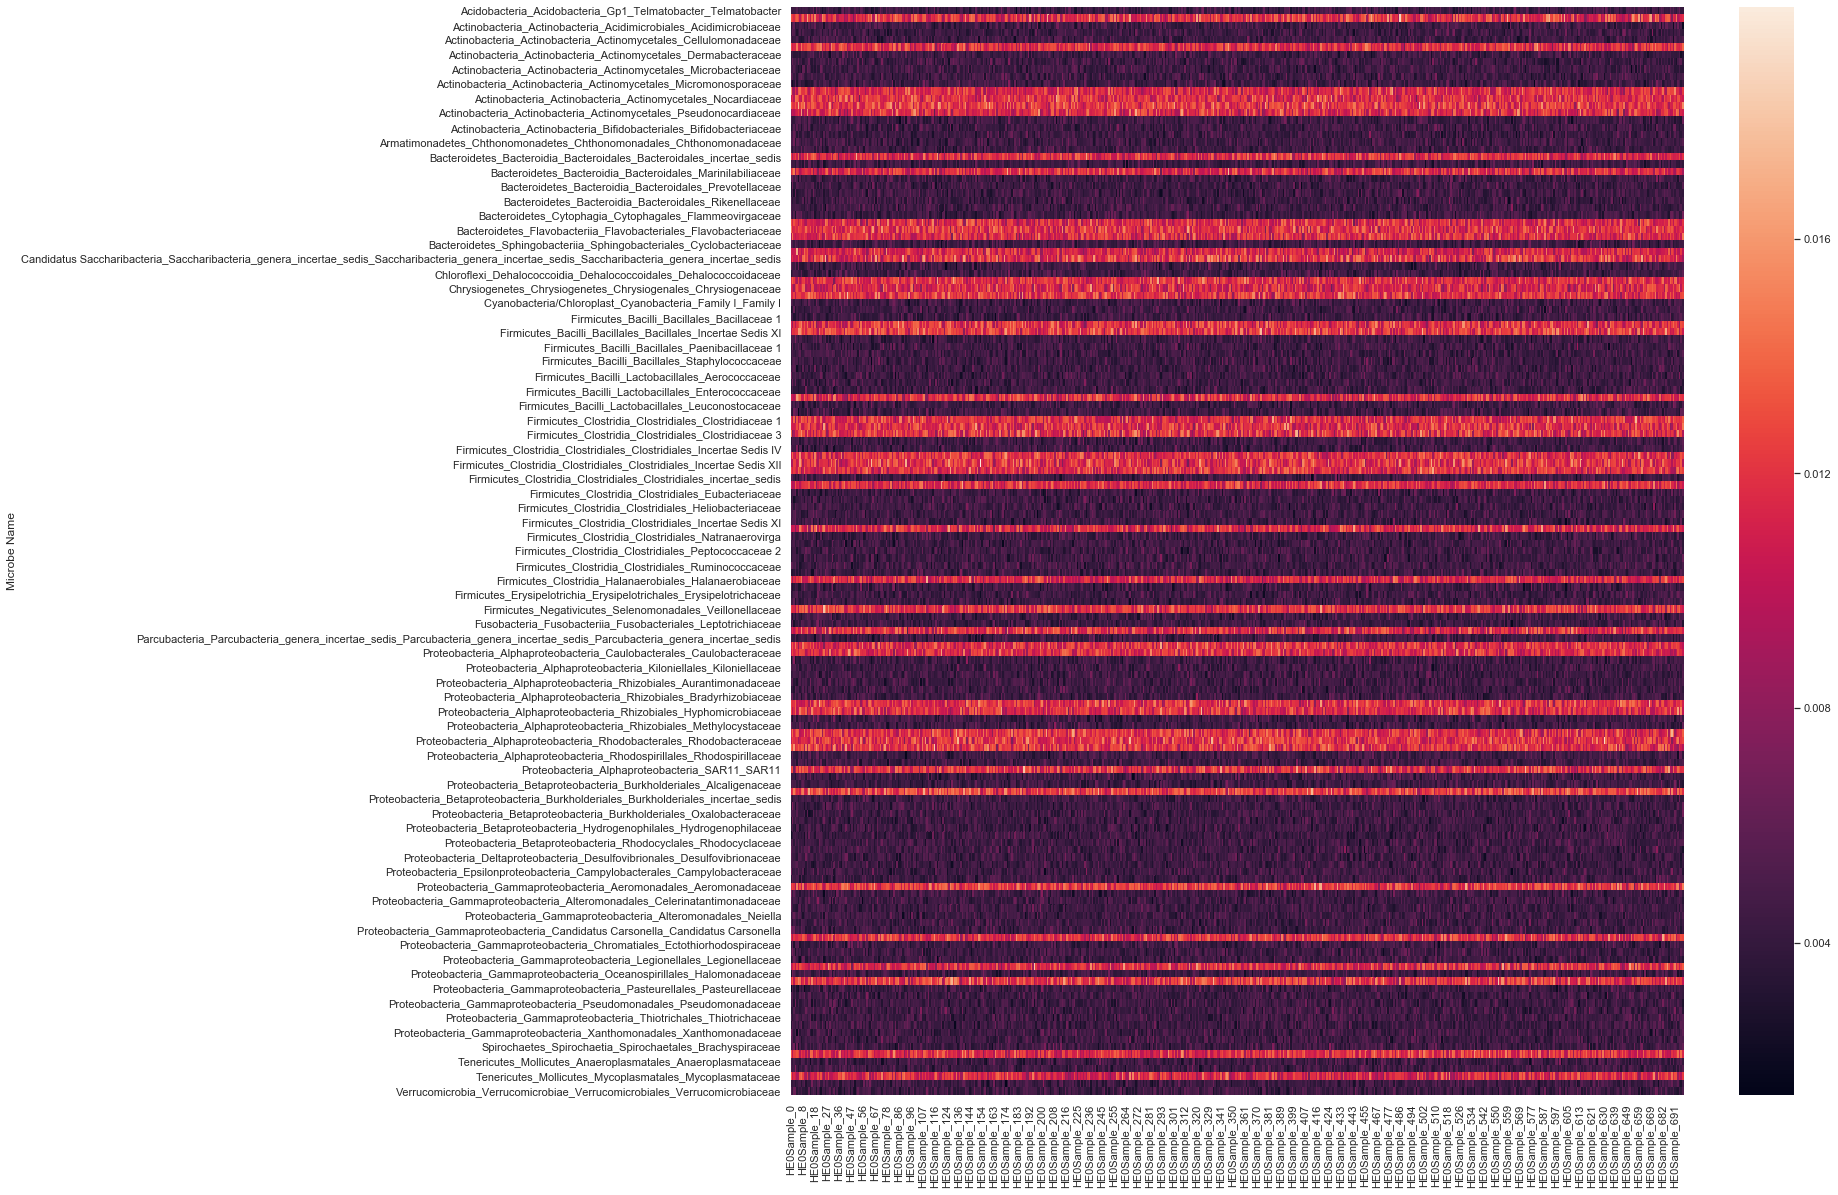

In [17]:
# plot the heatmap for HE0
print('Heatmap for HE0')
plt.figure(figsize=(20,20))
sns.heatmap(data_gn_HE0)
plt.show()

Heatmap for HE1


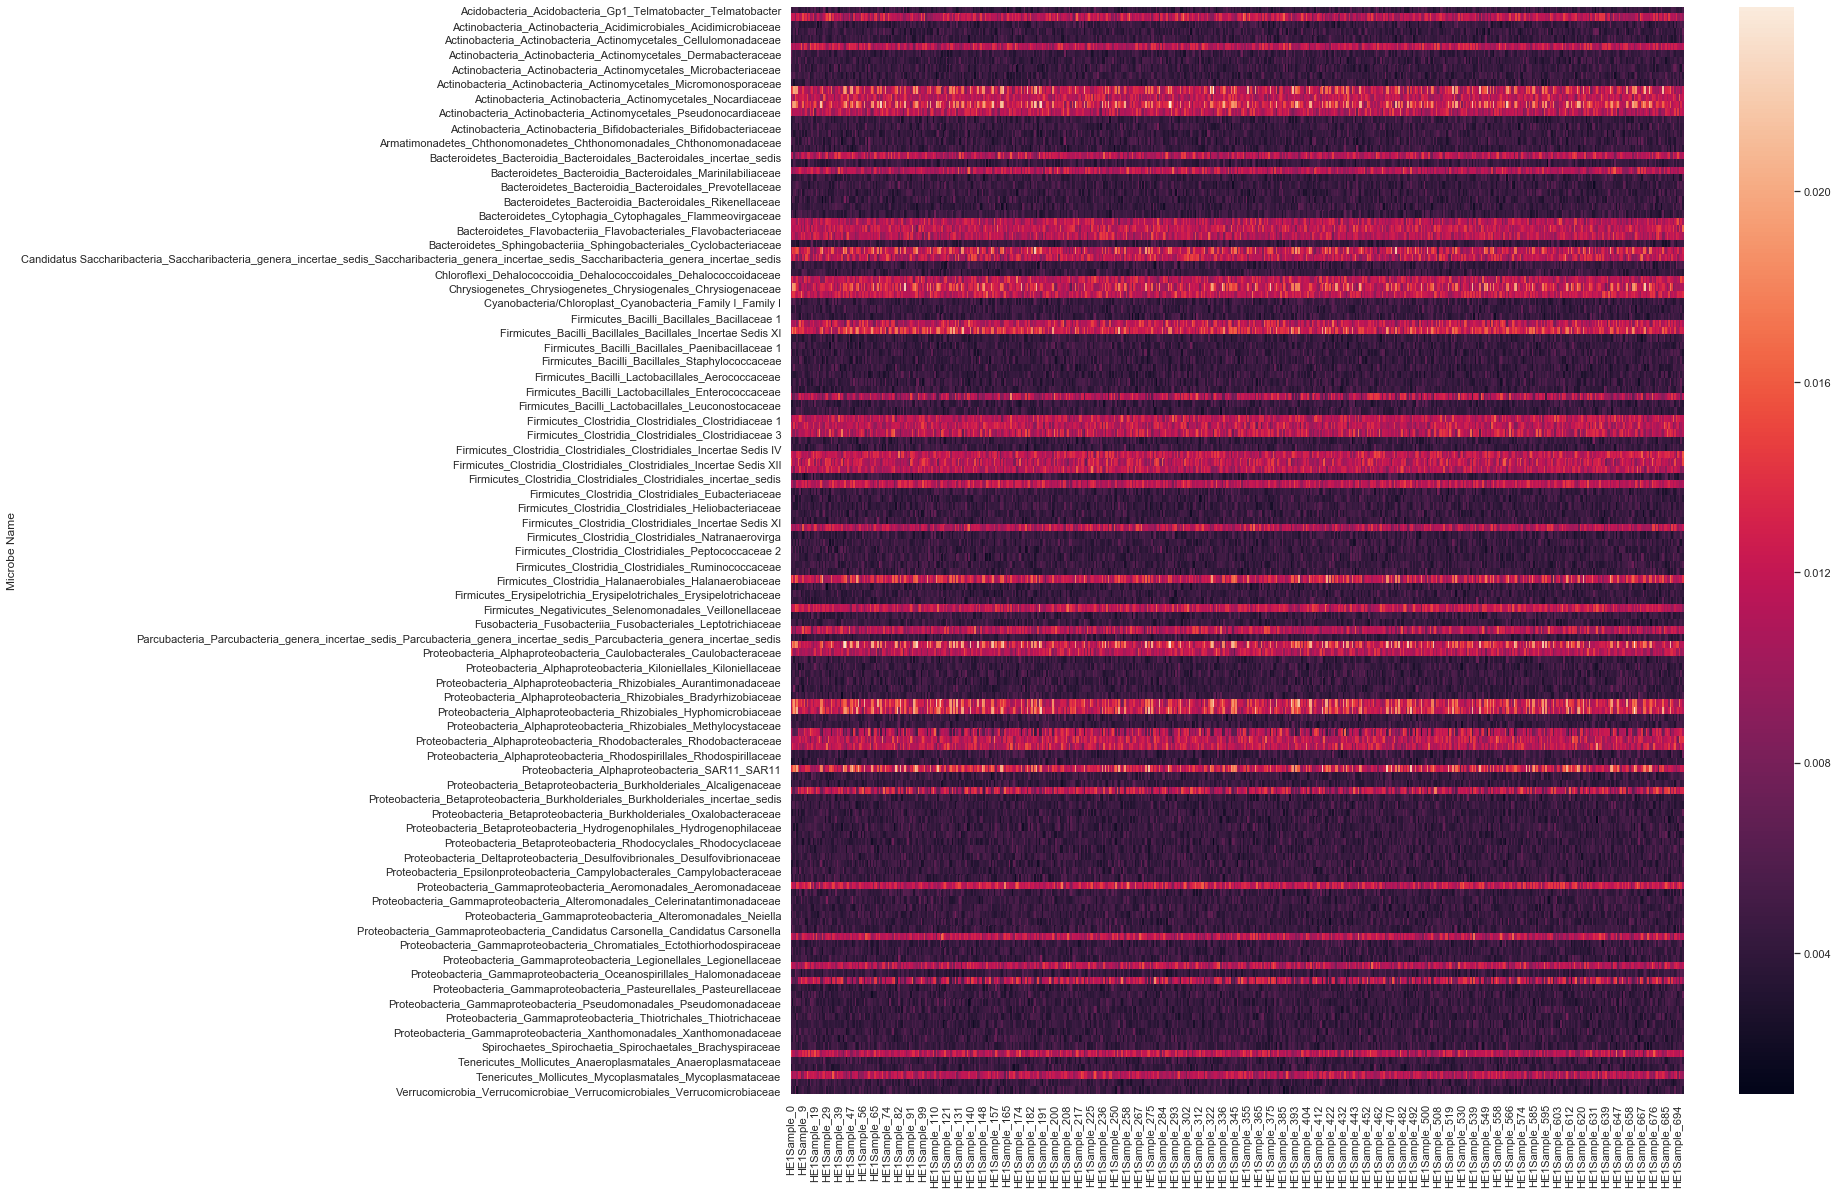

In [18]:
# plot the heatmap for HE1
print('Heatmap for HE1')
plt.figure(figsize=(20,20))
sns.heatmap(data_gn_HE1)
plt.show()

# Task 2: Statistical Analysis

## 1. Kolmogorov-Smirnov (KS) Test

### a. p-value for Two-Sample KS Test

In [15]:
#non-patient set name: data_gn_HE0
#patient set name: data_gn_HE1


st_value_list=[]
p_value_list=[]
for i in range(len(data_gn_HE0)):#use for loop to iterate all microbe rows and build the D and p value dictionary 
    HE0_dis=np.array(data_gn_HE0.iloc[i])
    HE1_dis=np.array(data_gn_HE1.iloc[i])
    st_value,p_value = st.ks_2samp(HE0_dis,  HE1_dis)
    st_value_list.append(st_value)#build the list for iteration to check for alter
    p_value_list.append(p_value)

alpha_list=[0.1,0.05,0.01,0.005,0.001]
num_alter_dict={}
outside_dict={}
for alpha in alpha_list:
    num_alter=0
    for p_value in p_value_list:# iterate the p_value_list to check how many micorbe satisfy the given alpha
        if p_value<alpha :#if smaller than alpha =>reject the null hypothesis 
            num_alter+=1
    num_alter_dict['alpha:'+str(alpha)]=num_alter#create the dictionary for the alter at given alpha

outside_dict['number of microbes with alter(KS_test)']=num_alter_dict
alter_dataframe_table=pd.DataFrame(outside_dict)#return the table

### b. Null Hypothesis of the KS Test in our Context
#### The distribution of a certain microbe in HE0 samples is the same as the distribution of that kind of microbe in HE1 samples
#### Example: For the microbe --Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter
#### The null hypothesis is that– the microbe Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter’s distribution in the sample of patients without hepatic encephalopathy (H0) is the same as its distribution in the sample of patients with hepatic encephalopathy


### c. Number of Genes with Significantly Altered Expression at Various Alpha Values

In [16]:
alter_dataframe_table

number of microbes with alter(KS_test)
alpha:0.001                                      21
alpha:0.005                                      26
alpha:0.01                                       27
alpha:0.05                                       36
alpha:0.1                                        42

## 2. Multiple Testing

### a. P-value
#### What does a p-value of 0.05 represent in our context?
#### The probability of the observed similarity of the distribution of H0 and H1 data set or a situation with less similarity happens is 0.05 when the null hypothesis (H0, H1 has the same distribution) is true.

### b. P-value Distribution
#### Uniform distribution between [0,1]

### c. Expected Number of Significant p-values

In [17]:
compare_alter_dict={}
total_microbe_number=data_gn_HE0.shape[0]
for alpha in alpha_list:
    signif_p_num=round(total_microbe_number*alpha)# if p is the uniform distribution the significant microbe number 
                                           #should equal to the total_microbe_number*alpha
                                            # in real world we can only get microbe number as an interger
    compare_alter_dict['alpha:'+str(alpha)]=signif_p_num
outside_dict['number of microbes with no alter(uniform p_value)']=compare_alter_dict
#add a new column to the outside dict 
#this can add a new column in the table
#make sure you run the former cell to get the right compare table
compare_table=pd.DataFrame(outside_dict)#return the compare table
compare_table

number of microbes with alter(KS_test)  \
alpha:0.1                                        42   
alpha:0.05                                       36   
alpha:0.01                                       27   
alpha:0.005                                      26   
alpha:0.001                                      21   

             number of microbes with no alter(uniform p_value)  
alpha:0.1                                                   15  
alpha:0.05                                                   7  
alpha:0.01                                                   1  
alpha:0.005                                                  1  
alpha:0.001                                                  0

#### From the comparision table we find that as alpha goes larger the rate between the analyzed alter number and the estimated alter number (comes from the uniform distribution estimation) { the rate=analyzed alter number / estimated alter number) becomes closer to 1 .And the two alter number both increase as the alpha value increase.

### d. Q-Q plot of p-values

#### i. 

In [22]:
#sample N values in the data frame, number of the microbe value
N=len(p_value_list)
#choose the N that is the same with the observed p_value size
uniform_p=st.uniform()
p_samples=uniform_p.rvs(size=N)

#### ii. 

In [23]:
from numpy import log10 
#get the -log10() of observed p and uniform p set and sort the list to the asending order
log_p_observe=-log10(p_value_list)
log_p_expected=-log10(p_samples)

#### iii. 

In [24]:
log_p_observe.sort()#sort by asending
log_p_expected.sort()

#### iv. 

#### v. 

#### vi. 

Text(0.5, 1.0, 'Q-Q plot')

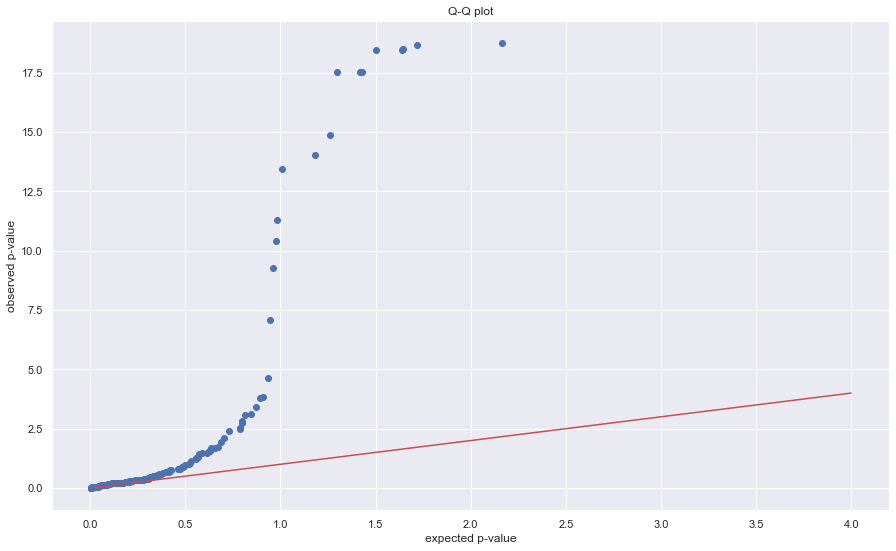

In [25]:
plt.figure(figsize=(15,9))#print dots
for i in range(len(log_p_expected)):
    plt.plot(log_p_expected[i],log_p_observe[i],'bo')
x_line=np.linspace(0,4,3001)#print line
y_line=np.linspace(0,4,3001)
plt.plot(x_line,y_line,'r')
plt.xlabel('expected p-value')
plt.ylabel('observed p-value')
plt.title('Q-Q plot')

### e. Follow-up Questions

#### i.The –log10() maps the original p value from [0,1] to the range [0, +∞] which will extract the graph range and help us to visualize the distribution of dots in the graph and see the deviation between the dots and the y=x line.

#### ii.The graph shows that at small p value (large -log10(p)) the distribution of the observed p value is not similar to the uniform distribution. But at large p (approximately at p larger than $10^{-0.4}=3981071705534972$), the observed p value follow the uniform distribution between [0,1]

# Task 3: Dimensionality Reduction and Clustering

## 1. PCA

### a. Performing PCA

In [18]:
#get the data
dataH0 = []
dataH1 = []
for i in range(len(data_gn_HE0.columns)):
    dataH0.append(np.array(data_gn_HE0.iloc[:,i]))
for i in range(len(data_gn_HE1.columns)):
    dataH1.append(np.array(data_gn_HE1.iloc[:,i]))
dataH0=np.array(dataH0)
dataH1=np.array(dataH1)

In [19]:
#apply PCA to our data
from sklearn.decomposition import PCA
pca0 = skl.decomposition.PCA(svd_solver = "full")
pca0.fit(dataH0)
pdataH0 = pca0.transform(dataH0)

pca1 = skl.decomposition.PCA(svd_solver = "full")
pca1.fit(dataH1)
pdataH1 = pca1.transform(dataH1)
print("PCA applied")

PCA applied



### b. Ordering Components

### c. Scatter Plot of Microbe Abundance

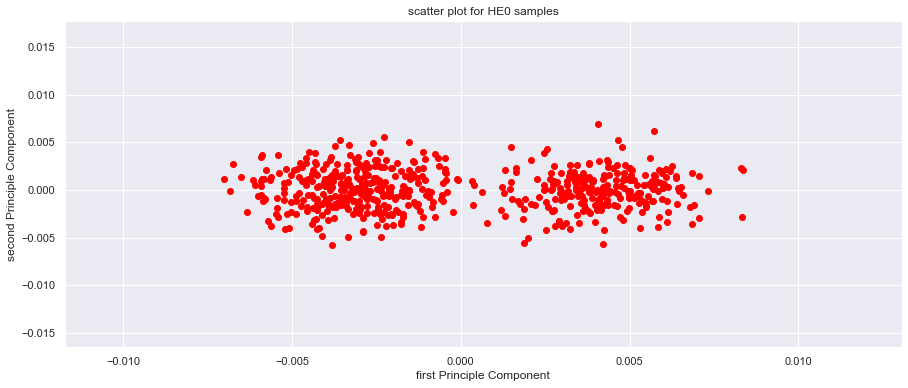

In [20]:
#generate plot scatter plot for HE0 samples
plt.figure(figsize=(15,6))
plt.scatter(pdataH0[:, 0], pdataH0[:, 1],c='#FF0000')
# plot formating
plt.xlabel('first Principle Component')
plt.ylabel('second Principle Component')
plt.title('scatter plot for HE0 samples')
plt.savefig('scatter_plot_HE0.png')
plt.show()

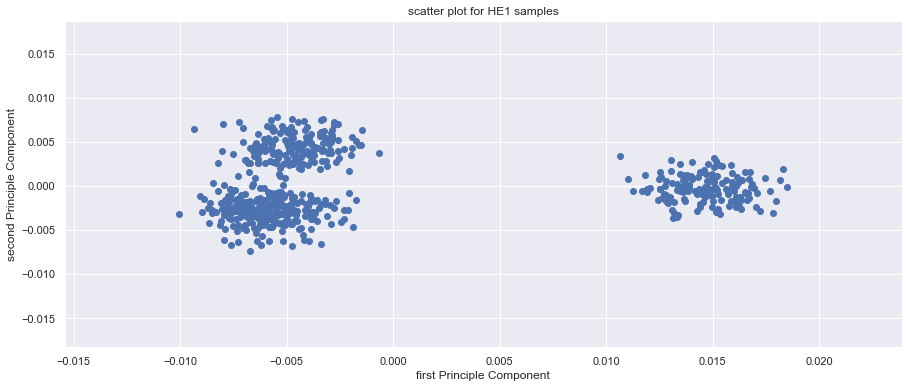

In [21]:
#generate plot scatter plot for HE1 samples
plt.figure(figsize=(15,6))
plt.scatter(pdataH1[:, 0], pdataH1[:, 1])
# plot formating
plt.xlabel('first Principle Component')
plt.ylabel('second Principle Component')
plt.title('scatter plot for HE1 samples')
plt.savefig('scatter_plot_HE1.png')
plt.show()

## 2. t-SNE

### a. Performing t-SNE

In [27]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#non-patient set name: data_gn_HE0
#patient set name: data_gn_HE1
#get the data
dataH0 = []
dataH1 = []
for i in range(len(data_gn_HE0.columns)):
    dataH0.append(np.array(data_gn_HE0.iloc[:,i]))
for i in range(len(data_gn_HE1.columns)):
    dataH1.append(np.array(data_gn_HE1.iloc[:,i]))
dataH0=np.array(dataH0)
dataH1=np.array(dataH1)

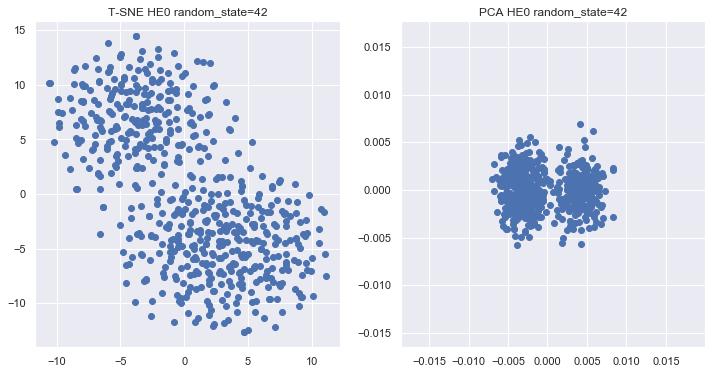

In [28]:
#T-SNE for H0 set
HE0_array=dataH0 #transform the dataframe to array to perform the T-SNE on the microbe aboundance dimension
tsne_HE0 = TSNE(n_components=2,random_state=42).fit_transform(HE0_array)#T_SNE training and reduce the dimension to 2D
pca_HE0 = PCA(random_state=42).fit_transform(HE0_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_HE0[:, 0], tsne_HE0[:, 1])
plt.title('T-SNE HE0 random_state=42')
plt.subplot(122)
plt.scatter(pca_HE0[:, 0], pca_HE0[:, 1])
plt.title('PCA HE0 random_state=42')
plt.show()

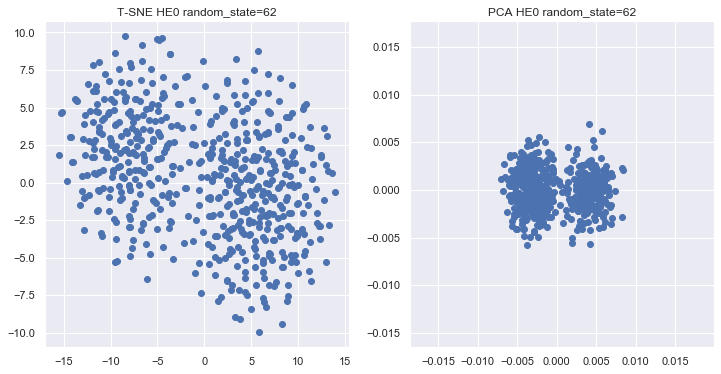

In [29]:
#T-SNE repeat for random state=62
HE0_array=dataH0 #transform the dataframe to array to perform the T-SNE on the microbe aboundance dimension
tsne_HE0 = TSNE(n_components=2,random_state=62).fit_transform(HE0_array)#T_SNE training and reduce the dimension to 2D
pca_HE0 = PCA(random_state=62).fit_transform(HE0_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_HE0[:, 0], tsne_HE0[:, 1])
plt.title('T-SNE HE0 random_state=62')
plt.subplot(122)
plt.scatter(pca_HE0[:, 0], pca_HE0[:, 1])
plt.title('PCA HE0 random_state=62')
plt.show()

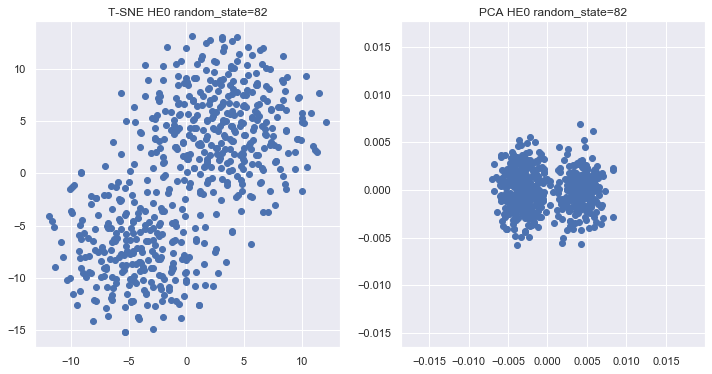

In [30]:
#T-SNE repeat for random state=82
HE0_array=dataH0 #transform the dataframe to array to perform the T-SNE on the microbe aboundance dimension
tsne_HE0 = TSNE(n_components=2,random_state=82).fit_transform(HE0_array)#T_SNE training and reduce the dimension to 2D
pca_HE0 = PCA(random_state=82).fit_transform(HE0_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_HE0[:, 0], tsne_HE0[:, 1])
plt.title('T-SNE HE0 random_state=82')
plt.subplot(122)
plt.scatter(pca_HE0[:, 0], pca_HE0[:, 1])
plt.title('PCA HE0 random_state=82')
plt.show()

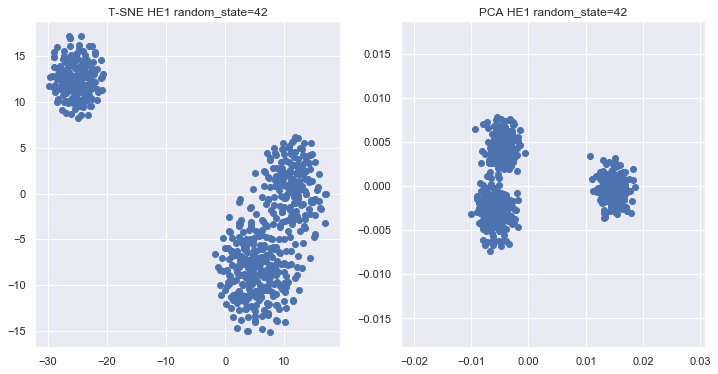

In [31]:
#T-SNE for H1 set
HE1_array=dataH1 #transform the dataframe to array to perform the T-SNE on the microbe aboundance dimension
tsne_HE1 = TSNE(n_components=2,random_state=42).fit_transform(HE1_array)#T_SNE training and reduce the dimension to 2D
pca_HE1 = PCA(random_state=42).fit_transform(HE1_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_HE1[:, 0], tsne_HE1[:, 1])
plt.title('T-SNE HE1 random_state=42')
plt.subplot(122)
plt.scatter(pca_HE1[:, 0], pca_HE1[:, 1])
plt.title('PCA HE1 random_state=42')
plt.show()

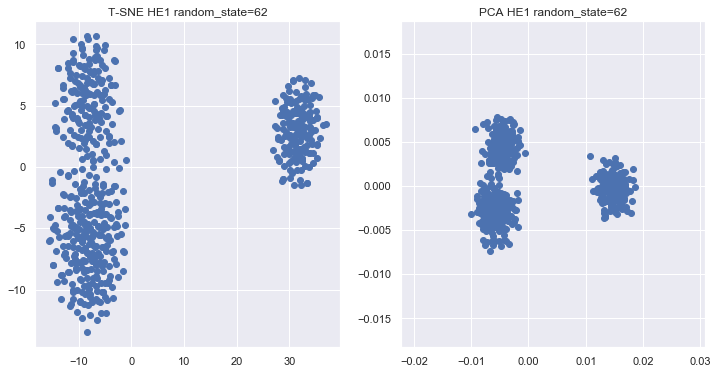

In [32]:
#T-SNE repeat for random state 62
HE1_array=dataH1 #transform the dataframe to array to perform the T-SNE on the microbe aboundance dimension
tsne_HE1 = TSNE(n_components=2,random_state=62).fit_transform(HE1_array)#T_SNE training and reduce the dimension to 2D
pca_HE1 = PCA(random_state=62).fit_transform(HE1_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_HE1[:, 0], tsne_HE1[:, 1])
plt.title('T-SNE HE1 random_state=62')
plt.subplot(122)
plt.scatter(pca_HE1[:, 0], pca_HE1[:, 1])
plt.title('PCA HE1 random_state=62')
plt.show()

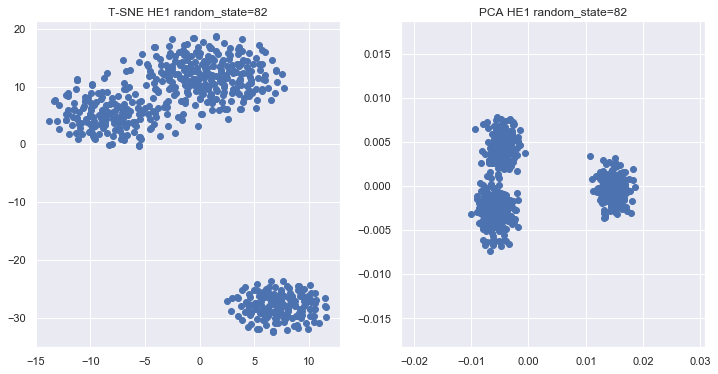

In [33]:
#T-SNE repeat for random state 82
HE1_array=dataH1 #transform the dataframe to array to perform the T-SNE on the microbe aboundance dimension
tsne_HE1 = TSNE(n_components=2,random_state=82).fit_transform(HE1_array)#T_SNE training and reduce the dimension to 2D
pca_HE1 = PCA(random_state=82).fit_transform(HE1_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_HE1[:, 0], tsne_HE1[:, 1])
plt.title('T-SNE HE1 random_state=82')
plt.subplot(122)
plt.scatter(pca_HE1[:, 0], pca_HE1[:, 1])
plt.title('PCA HE1 random_state=82')
plt.show()

### Summary of observation
#### The T-SNE methods that reducing the dimension of dataset HE0 and HE1 to 2D both cluster our data. The HE0 set is grouped to 2 clusters, while the HE1 set is grouped to 3 clusters.(at all random_state) However, the clusters' distribution for both HE0 and HE1 set will vary with the random state.

### b. Comparing with PCA

### Similarity of PCA and T-SNE:
##### The two methods both can reduce the high dimension data to the 2D and keep the inner-relationship of data. The term of keeping relationship between data is shown by the result that both PCA and T-SNE keeps the clusters of data (PCA and T-SNE both generate 2 clusters for HE0 set and 3 clusters for HE1 set). 
### DIfference of PCA and T-SNE:
##### 1.The result of PCA won't be affected by the random state( the distributions of PCA 2D result is the same for all random state)  However, the result of T-SNE will be affected by the random state( the distribution of T-SNE 2D result varies with the random state)
##### 2. PCA's result is shown by the original data value ( the scale of the x-y axis or the 2 principle components is the scale of the original microbe aboundance) The PCA maps the high dimension data to the original data value scale and may cause the Crowding Problem( too many high dimension data points map to a samll low dimension region) But the T-SNE has a different scale of the x-y axis compared to the original data value. The T-SNE maps the high dimensional data to a larger scale low dimension region and avoid the Crowding Problem. 

In [34]:
dataH0=[]
for i in range(5):
    dataH0.append(np.array(data_gn_HE0.iloc[:,i]))
    print(len(np.array(data_gn_HE0.iloc[:,i])))

149
149
149
149
149


## 3. Clustering

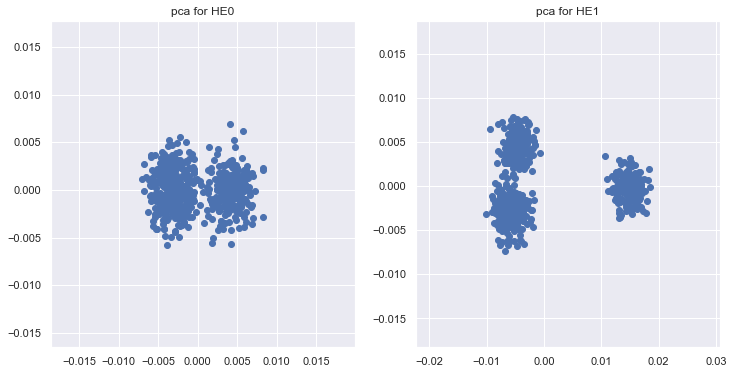

In [22]:
from sklearn.decomposition import PCA
#non-patient set name: data_gn_HE0
#patient set name: data_gn_HE1
#get the data
dataH0 = []
dataH1 = []
for i in range(len(data_gn_HE0.columns)):
    dataH0.append(np.array(data_gn_HE0.iloc[:,i]))
for i in range(len(data_gn_HE1.columns)):
    dataH1.append(np.array(data_gn_HE1.iloc[:,i]))
dataH0=np.array(dataH0)
dataH1=np.array(dataH1)
HE0_array=dataH0
HE1_array=dataH1
pca0 = PCA()
pca0.fit(HE0_array)
pca_HE0=pca0.transform(HE0_array)
pca1 = PCA()
pca1.fit(HE1_array)
pca_HE1=pca1.transform(HE1_array)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(pca_HE0[:, 0], pca_HE0[:, 1])
plt.title('pca for HE0')
plt.subplot(122)
plt.scatter(pca_HE1[:, 0], pca_HE1[:, 1])
plt.title('pca for HE1')
plt.show()

### a. K-Means

#### By intuition and inspection of the PCA graph, we can shrink the range of k for H0,H1 to [2,6]

$
\text{By intuition and inspection of the PCA graph, we can shrink the range of k for H0,H1 to [2,6].}
$

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics

# analysis of the cluster number for K-means
Kmeans_HE0_result=[]#store the clustering result 
Kmeans_HE1_result=[]
Kmeans_HE0_silhouette_score=[]#store the kmeans result score based on the Silhouette Coefficient
Kmeans_HE1_silhouette_score=[]
Kmeans_HE0_CH_score=[]   #store the kmeans result score based on the Calinski-Harabasz Index
Kmeans_HE1_CH_score=[]

for i in range(5):#k=i+2
    y_HE0_pred = KMeans(n_clusters=i+2, random_state=9).fit_predict(pca_HE0)#make the clustering for current k
    y_HE1_pred = KMeans(n_clusters=i+2, random_state=9).fit_predict(pca_HE1)
    Kmeans_HE0_result.append(y_HE0_pred)
    Kmeans_HE1_result.append(y_HE1_pred)
    HE0_s_grade=metrics.silhouette_score(pca_HE0, y_HE0_pred)  #get the silhouette_score for current k
    HE1_s_grade=metrics.silhouette_score(pca_HE1, y_HE1_pred)
    HE0_CH_grade=metrics.calinski_harabasz_score(pca_HE0, y_HE0_pred) #get the Calinski-Harabasz_score for current k
    HE1_CH_grade=metrics.calinski_harabasz_score(pca_HE1, y_HE1_pred)
    Kmeans_HE0_silhouette_score.append(HE0_s_grade)
    Kmeans_HE1_silhouette_score.append(HE1_s_grade)
    Kmeans_HE0_CH_score.append(HE0_CH_grade)
    Kmeans_HE1_CH_score.append(HE1_CH_grade)

In [24]:
# analysis result
for i in range(5):
    print("HE0: k={},  silhouette score={}, Calinski-Harabasz score={}\n".format(i+2,Kmeans_HE0_silhouette_score[i],Kmeans_HE0_CH_score[i]))
for i in range(5):    
    print("HE1: k={},  silhouette score={}, Calinski-Harabasz score={}\n".format(i+2,Kmeans_HE1_silhouette_score[i],Kmeans_HE1_CH_score[i]))

HE0: k=2,  silhouette score=0.0623645329802057, Calinski-Harabasz score=40.18006251165138

HE0: k=3,  silhouette score=0.02528944408455015, Calinski-Harabasz score=23.045045815362155

HE0: k=4,  silhouette score=0.012378789091489333, Calinski-Harabasz score=16.848825205975768

HE0: k=5,  silhouette score=0.010325837078654055, Calinski-Harabasz score=13.645941451672858

HE0: k=6,  silhouette score=0.011055576271412142, Calinski-Harabasz score=11.721900301775

HE1: k=2,  silhouette score=0.28789834430462, Calinski-Harabasz score=232.92674180935427

HE1: k=3,  silhouette score=0.12734698600230596, Calinski-Harabasz score=136.70142611733658

HE1: k=4,  silhouette score=0.09970625326687826, Calinski-Harabasz score=93.14433078132376

HE1: k=5,  silhouette score=0.08989094995737454, Calinski-Harabasz score=71.13252852045048

HE1: k=6,  silhouette score=0.02082007946464082, Calinski-Harabasz score=57.84132261189822



#### We use the  silhouette score and the Calinski-Harabasz score to evaluate our k-means clustering result for different k value. (the larger the score is, the better the clustering is) We find the silhouette score and the Calinski-Harabasz score confirm each other. For HE0, k=2 has the largest silhouette score and the Calinski-Harabasz score. 
### But there is potential of overfitting for the HE1 (the k=2 score is relatively too high) 
#### From the observation, we see that the clustering of PCA_HE1 data set is more likely to be clustered to 3 clusters. And we see that "HE1: k=3,  silhouette score=0.12721581850790498, Calinski-Harabasz score=136.69591009543345" the score is also much better than the remaining k.(k=3 is also an acceptable solution for k)
#### As a result, we choose k=3 for HE1 data set

$
\text{We use the Silhouette score and the Calinski-Harabasz score to evaluate our k-means clustering results}\\ 
\text{for different $k$ values. Note that the larger both the scores are, the better the clustering result is.}\\  
\text{We find that the Silhouette score and the Calinski-Harabasz score verify each other. For HE0 samples,}\\  
\text{$k=2$ has the largest Silhouette score and the largest Calinski-Harabasz score.}\\  
\ \\
\text{However, there is potential of overfitting in the HE1 samples if $k=2$, because both the scores for $k=2$}\\  
\text{are relatively too high. From our observation, we see that the HE1 data set after applying PCA is more}\\  
\text{likely to be divided into 3 clusters. Besides, given that "HE1: k=3,  silhouette score=0.12734698600230596,}\\  
\text{Calinski-Harabasz score=136.70142611733658", both the scores are still much better than the scores for the}\\  
\text{remaining $k$ values. Therefore, $k=3$ is also an acceptable cluster value. Based on our observation and analysis,}\\ 
\text{we choose $k$ to be 3 for the HE1 data set after applying PCA.}
$

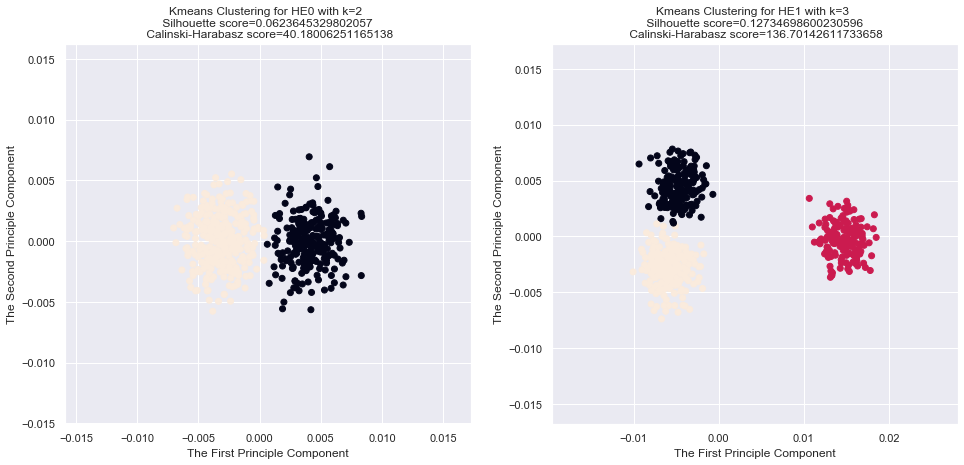

In [25]:
# cluster results from K-means
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.scatter(pca_HE0[:, 0], pca_HE0[:, 1],c = Kmeans_HE0_result[0])
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('Kmeans Clustering for HE0 with k={} \n Silhouette score={} \n Calinski-Harabasz score={}'.format(2,Kmeans_HE0_silhouette_score[0],Kmeans_HE0_CH_score[0]))     

plt.subplot(122)
plt.scatter(pca_HE1[:, 0], pca_HE1[:, 1],c = Kmeans_HE1_result[1])
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('Kmeans Clustering for HE1 with k={} \n Silhouette score={} \n Calinski-Harabasz score={}'.format(3,Kmeans_HE1_silhouette_score[1],Kmeans_HE1_CH_score[1]))     

plt.show()

### b. GMM

In [26]:
from sklearn.mixture import GaussianMixture

# apply GMM
GMM_HE0_result=[]#store the GMM clustering result 
GMM_HE1_result=[]
BIC_HE0=[]#store the BIC value for certain k value
BIC_HE1=[]

for i in range(5):#k=i+2
    y_HE0 = GaussianMixture(n_components=i+2, random_state=9)
    y_HE0.fit(pca_HE0)#make the clustering for current k
    y_HE0_pred= GaussianMixture(n_components=i+2, random_state=9).fit_predict(pca_HE0)
    y_HE1 = GaussianMixture(n_components=i+2, random_state=9)
    y_HE1.fit(pca_HE1)
    y_HE1_pred= GaussianMixture(n_components=i+2, random_state=9).fit_predict(pca_HE1)
    GMM_HE0_result.append(y_HE0_pred)
    GMM_HE1_result.append(y_HE1_pred)
    BICvalue_HE0=y_HE0.bic(pca_HE0)
    BICvalue_HE1=y_HE1.bic(pca_HE1)
    BIC_HE0.append( BICvalue_HE0)
    BIC_HE1.append( BICvalue_HE1)

#### By inspection of the PCA graph and the Kmeans result, we can choose the k for H0,H1 as 2 and 3

$
\text{By inspection of the PCA graph and the K-means results, we can choose the $k$ to be 2 for HE0 while 3 for HE1.}
$

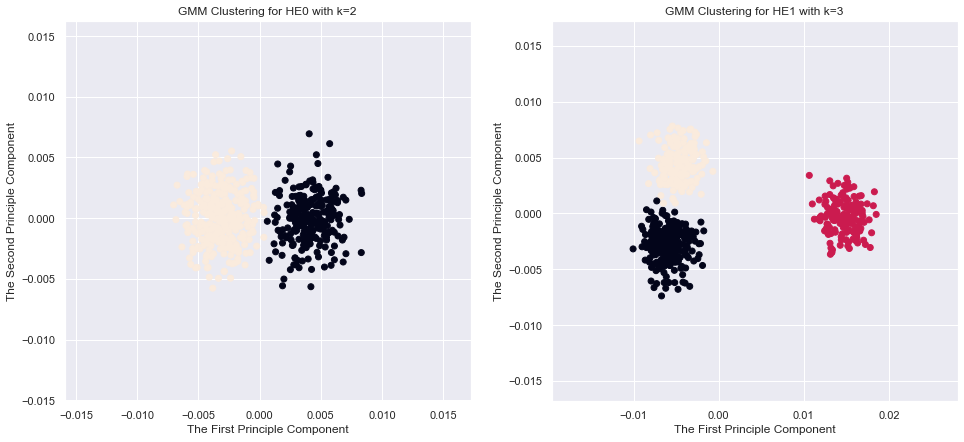

In [27]:
# cluster results from GMM
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.scatter(pca_HE0[:, 0], pca_HE0[:, 1],c = GMM_HE0_result[0])
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('GMM Clustering for HE0 with k={}'.format(2))    

plt.subplot(122)
plt.scatter(pca_HE1[:, 0], pca_HE1[:, 1],c = GMM_HE1_result[1])
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('GMM Clustering for HE1 with k={}'.format(3)) 

plt.show()

### c. Single and Complete Linkage Hierarchical

$
\text{By observation on the PCA results, we decide to choose the $k$ to be 2 for HE0 while 3 for HE1.}
$

In [28]:
# data interface
dataH0 = PCA_data_HE0
dataH1 = PCA_data_HE1

pdataH0 = pdataHE0
pdataH1 = pdataHE1

NameError: name 'PCA_data_HE0' is not defined

In [29]:
# generate points
hierH0 = []
hierH1 = []
for i in range(len(dataH0)):
    hierH0.append([pdataH0[i, 0], pdataH0[i, 1]])
for i in range(len(dataH1)):
    hierH1.append([pdataH1[i, 0], pdataH1[i, 1]])
#generate cluster
from sklearn.cluster import AgglomerativeClustering
#generate cluster using single linkage Hierarchical clustering
clusH0s = skl.cluster.AgglomerativeClustering(n_clusters=2, linkage = 'single').fit(hierH0)
clusH1s = skl.cluster.AgglomerativeClustering(n_clusters=3, linkage = 'single').fit(hierH1)
#generate cluster using complete linkage Hierarchical clustering
clusH0c = skl.cluster.AgglomerativeClustering(n_clusters=2, linkage = 'complete').fit(hierH0)
clusH1c = skl.cluster.AgglomerativeClustering(n_clusters=3, linkage = 'complete').fit(hierH1)

We decide to use 2 clusters by cutting dendrogram like this:


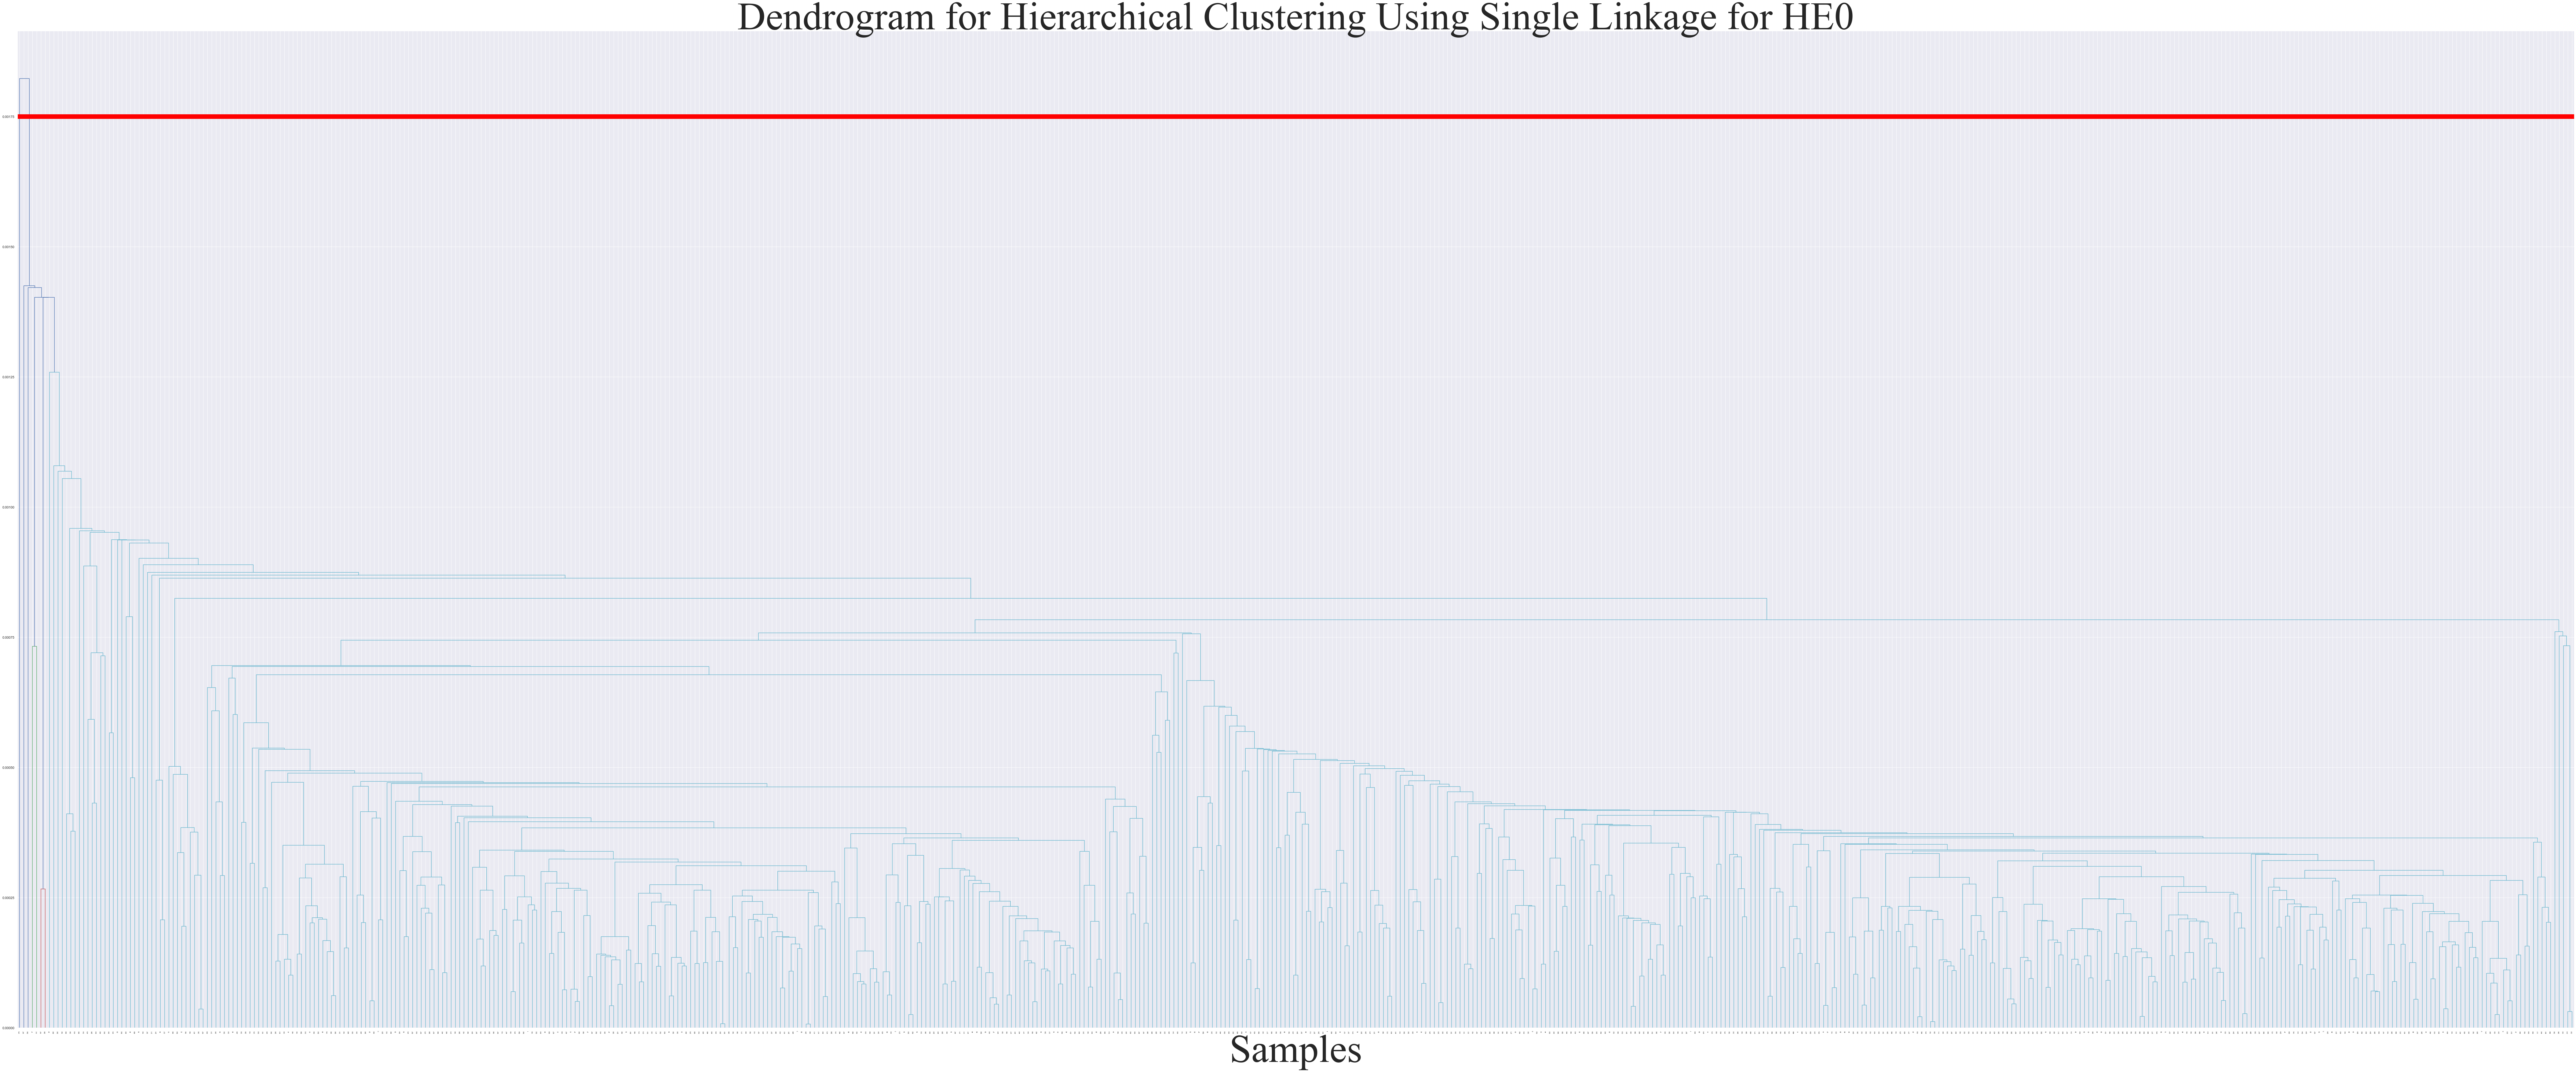

In [30]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 128,
}
from scipy.cluster import hierarchy
# draw dendrogram and decide number of clusters according to its shape
dH0s = plt.figure(figsize=(150,60))
Z = hierarchy.linkage(hierH0, 'single')
hierarchy.dendrogram(Z)
print("We decide to use 2 clusters by cutting dendrogram like this:")
plt.axhline(0.00175, 0, 3,color="red",linewidth = '15')
plt.xlabel('Samples',font1)
plt.title('Dendrogram for Hierarchical Clustering Using Single Linkage for HE0',font1)

plt.show()

We decide to use 2 clusters by cutting dendrogram like this:


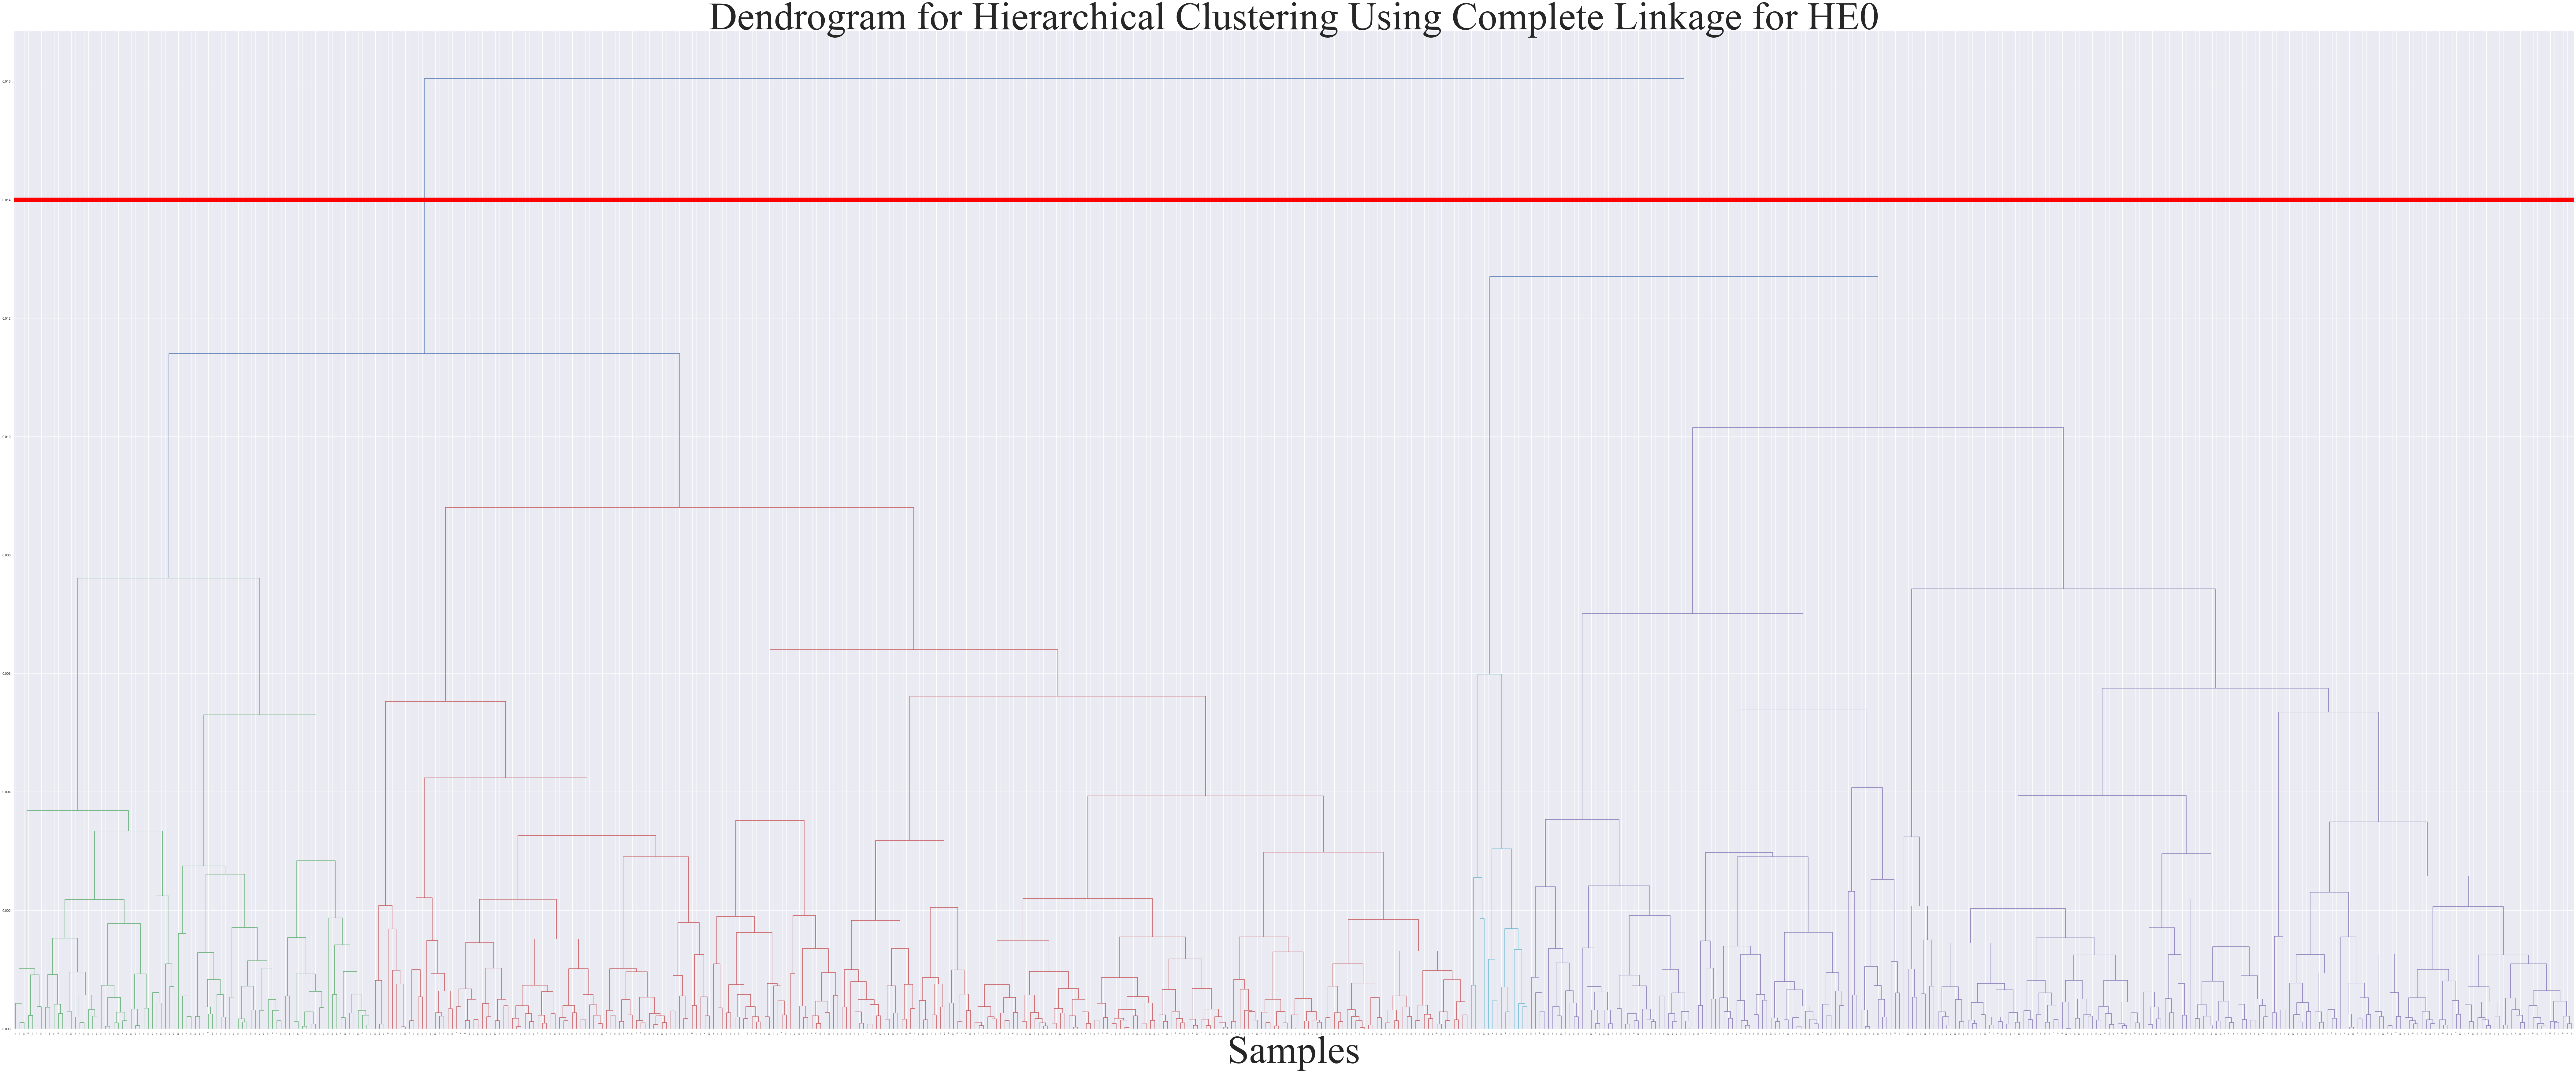

In [31]:
# draw dendrogram and decide number of clusters according to its shape
dH0c = plt.figure(figsize=(150,60))
Z = hierarchy.linkage(hierH0, 'complete')
hierarchy.dendrogram(Z)
print("We decide to use 2 clusters by cutting dendrogram like this:")
plt.axhline(0.014, 0, 3,color="red",linewidth = '15')
plt.xlabel('Samples',font1)
plt.title('Dendrogram for Hierarchical Clustering Using Complete Linkage for HE0',font1)

plt.show()

We decide to use 3 clusters by cutting dendrogram like this:


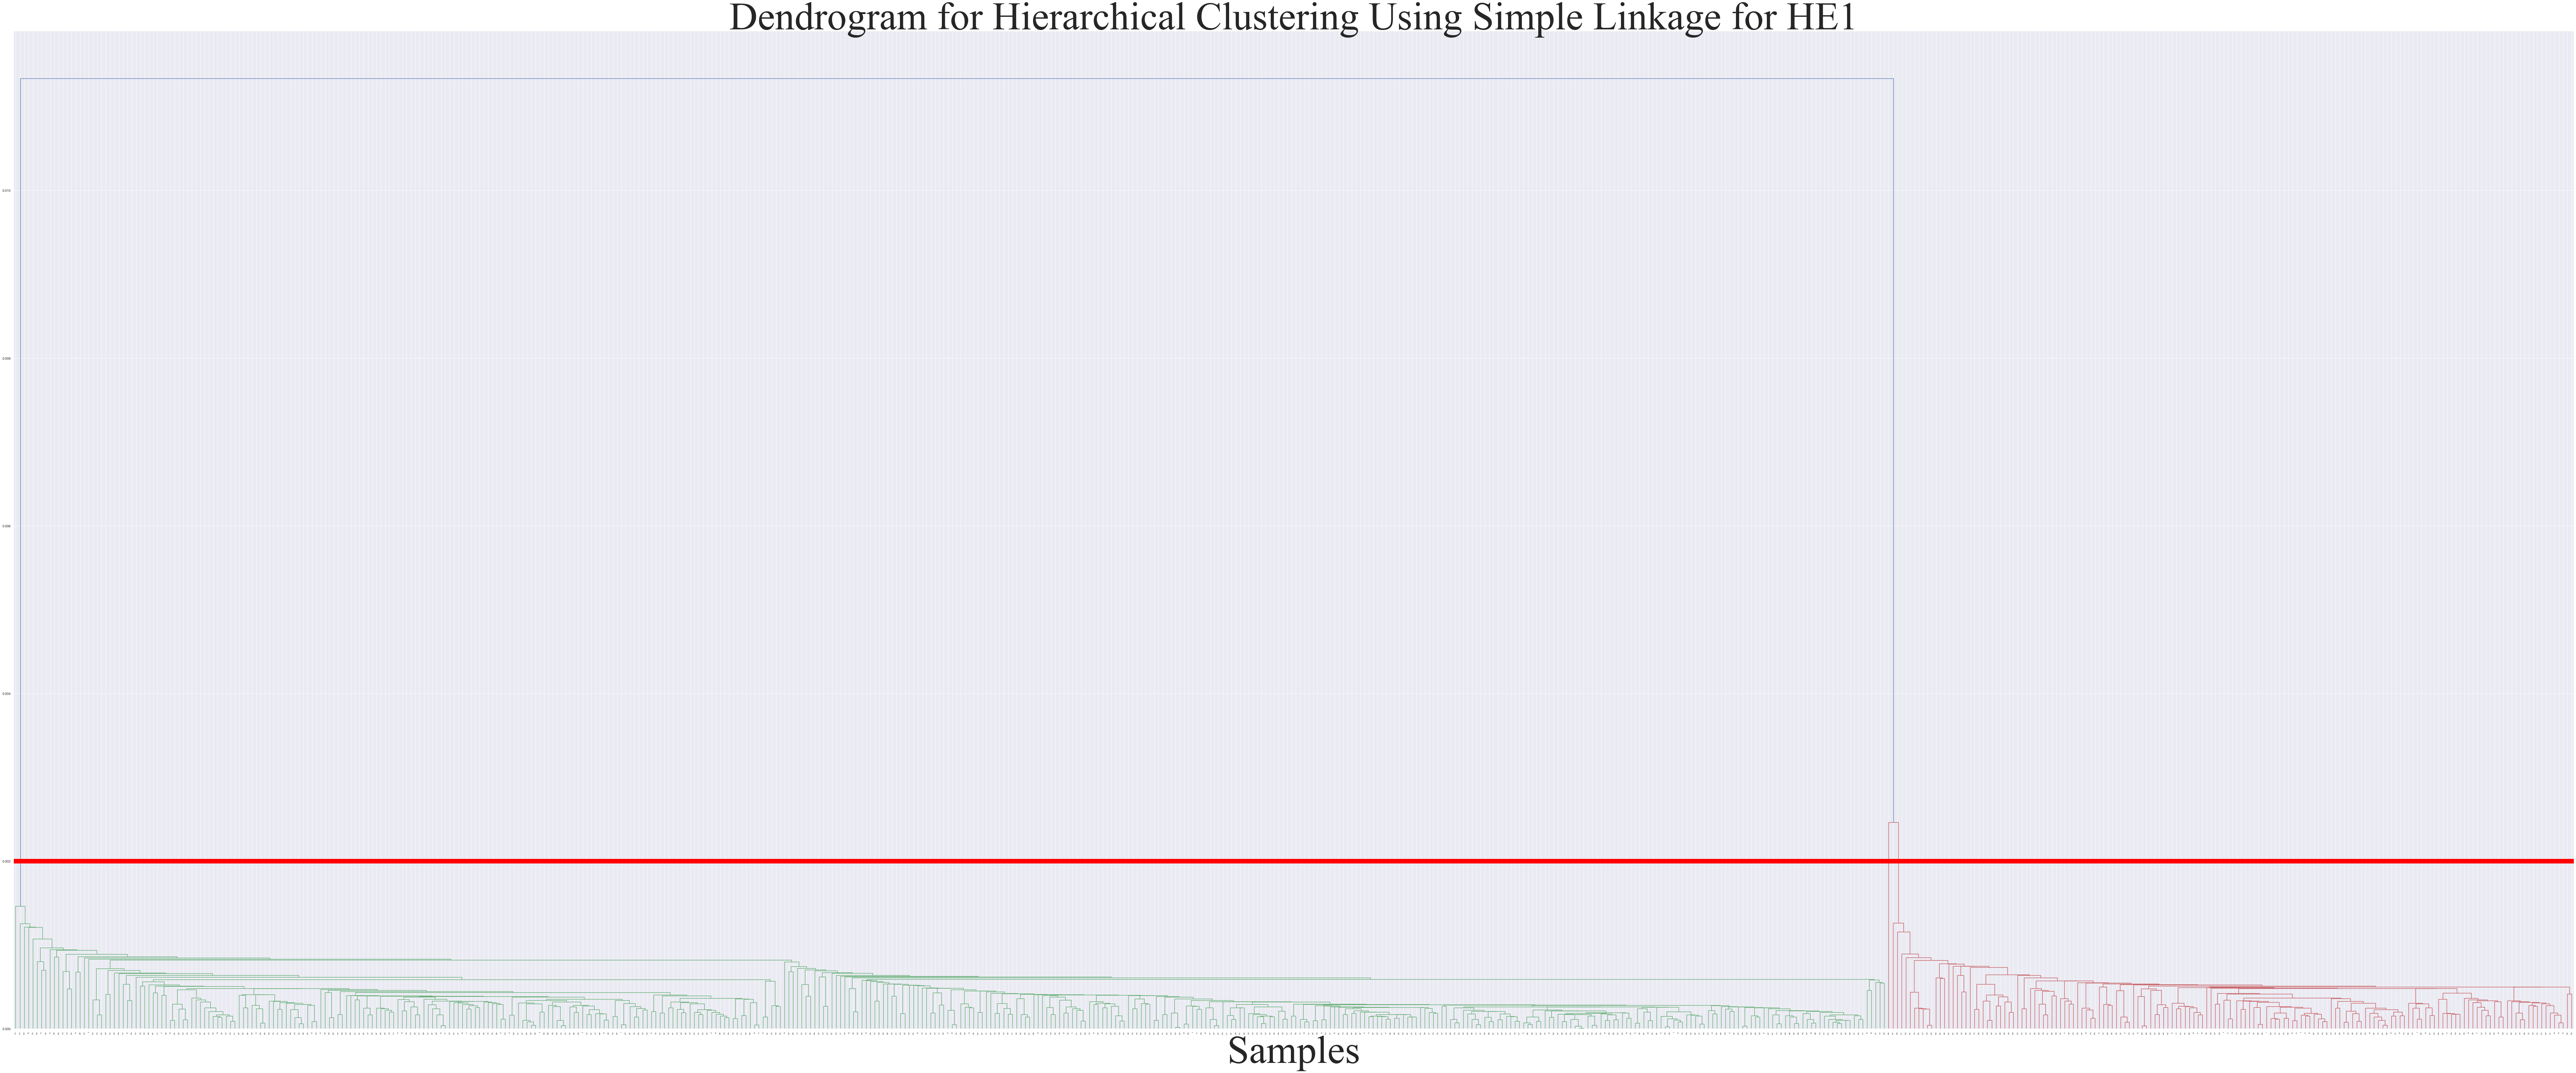

In [32]:
# draw dendrogram and decide number of clusters according to its shape
dH1c = plt.figure(figsize=(150,60))
Z = hierarchy.linkage(hierH1, 'single')
hierarchy.dendrogram(Z)
print("We decide to use 3 clusters by cutting dendrogram like this:")
plt.axhline(0.002, 0, 3,color="red",linewidth = '15')
plt.xlabel('Samples',font1)
plt.title('Dendrogram for Hierarchical Clustering Using Simple Linkage for HE1',font1)

plt.show()

We decide to use 3 clusters by cutting dendrogram like this:


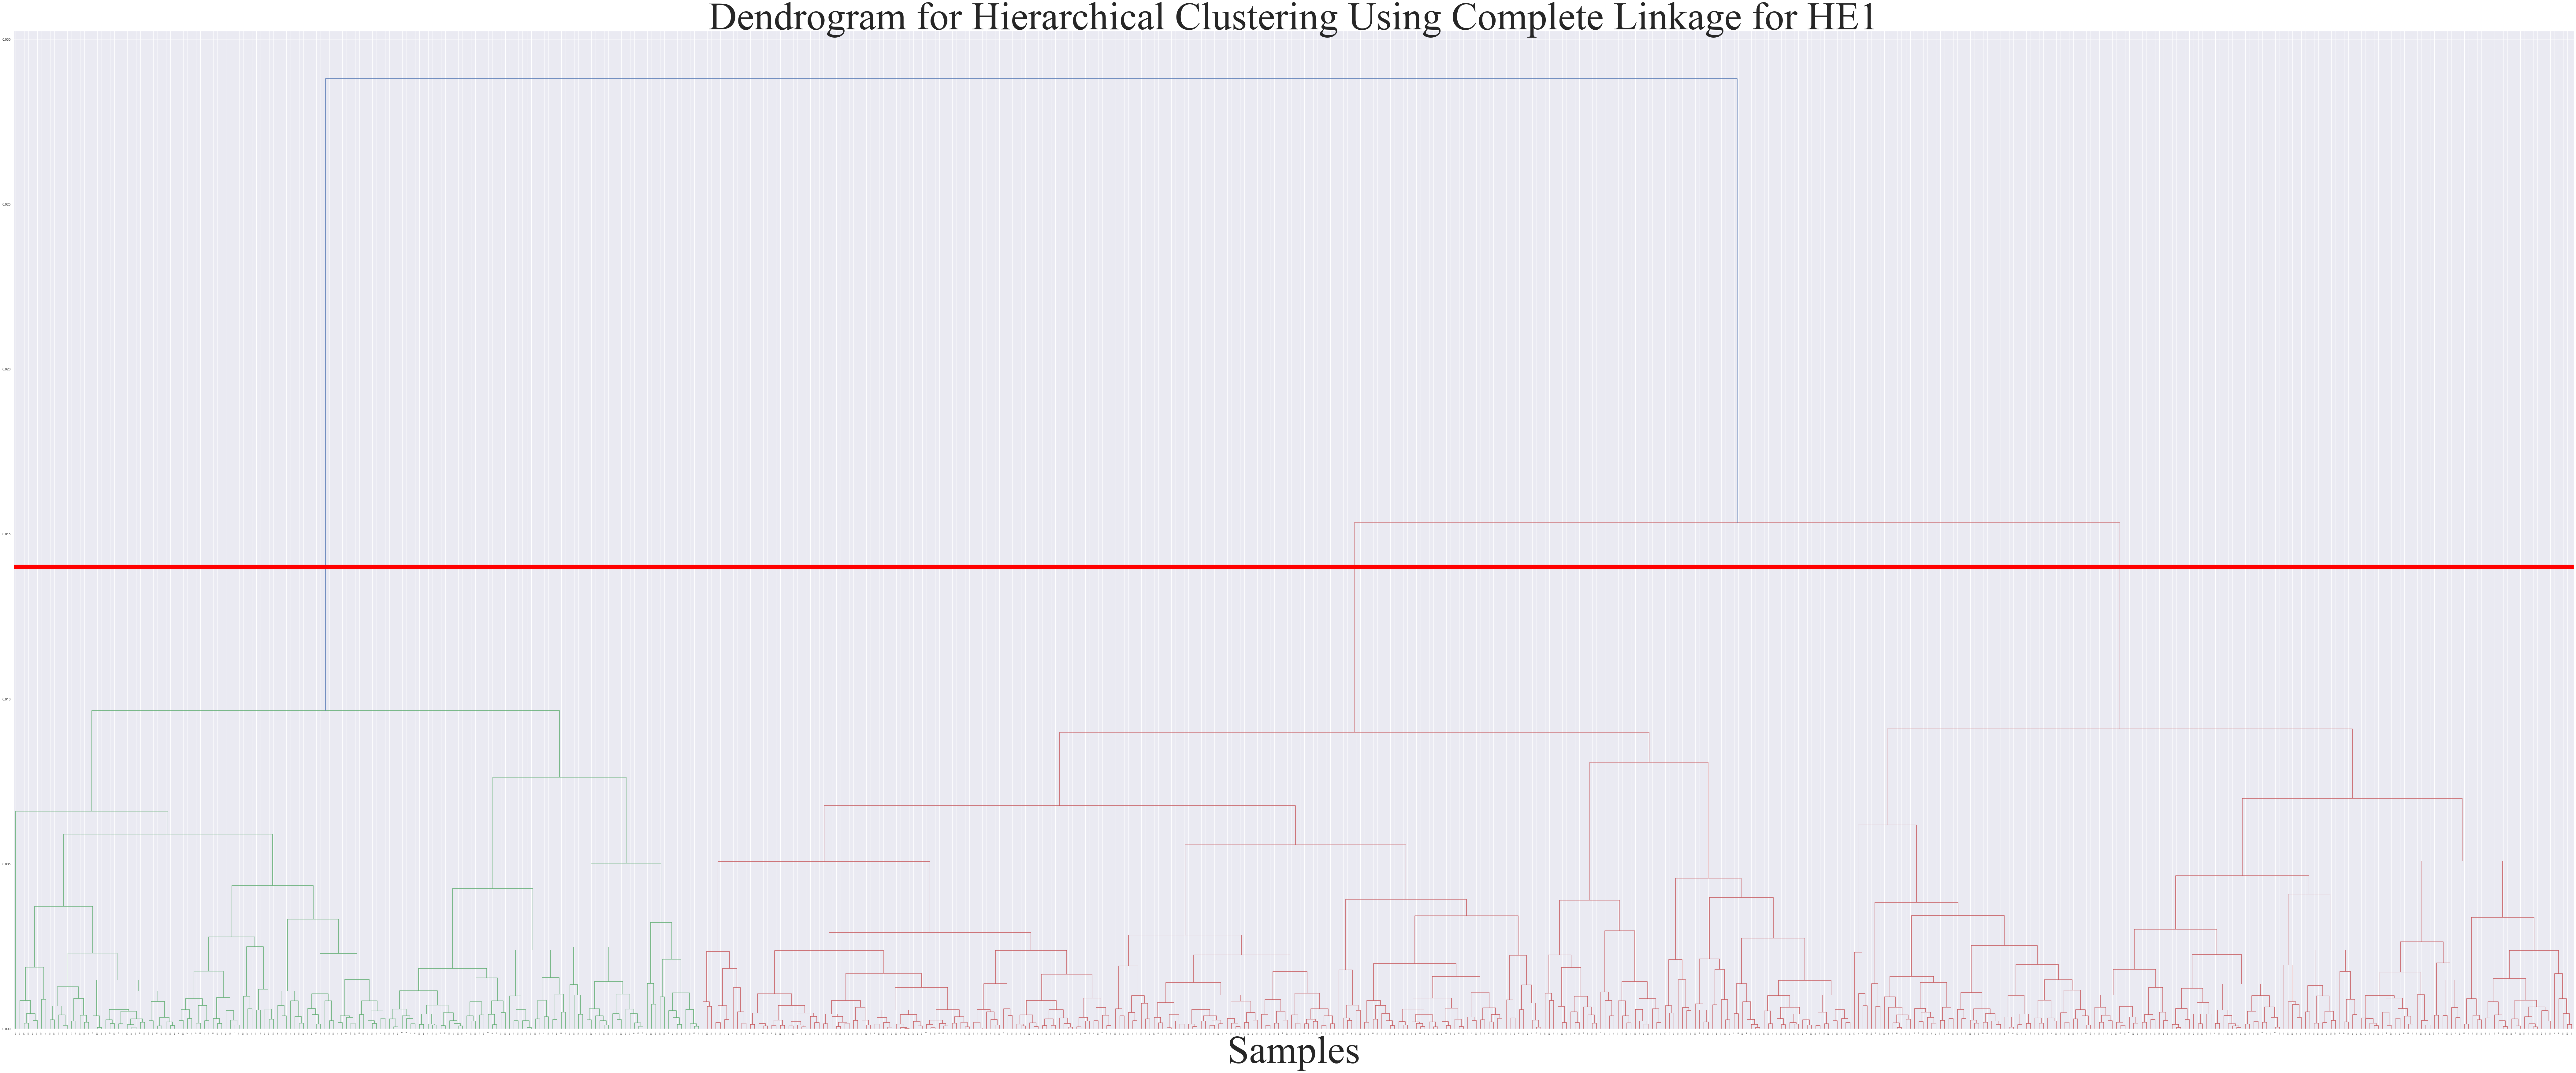

In [33]:
# draw dendrogram and decide number of clusters according to its shape
dH1c = plt.figure(figsize=(150,60))
Z = hierarchy.linkage(hierH1, 'complete')
hierarchy.dendrogram(Z)
print("We decide to use 3 clusters by cutting dendrogram like this:")
plt.axhline(0.014, 0, 3,color="red",linewidth = '15')
plt.xlabel('Samples',font1)
plt.title('Dendrogram for Hierarchical Clustering Using Complete Linkage for HE1',font1)

plt.show()

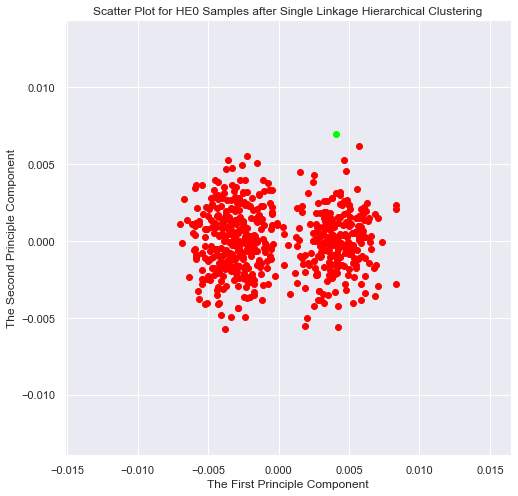

In [35]:
# generate single linkage Hierarchical clustering for HE0 graph
H0single=[[],[]]
for i in range(len(dataH0)):
    H0single[clusH0s.labels_[i]].append(hierH0[i])
plt.figure(figsize=(8,8)) 
plt.scatter(np.array(H0single[0])[:,0],np.array(H0single[0])[:,1],c='#FF0000')
plt.scatter(np.array(H0single[1])[:,0],np.array(H0single[1])[:,1],c='#00FF00')
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('Scatter Plot for HE0 Samples after Single Linkage Hierarchical Clustering')

plt.show()

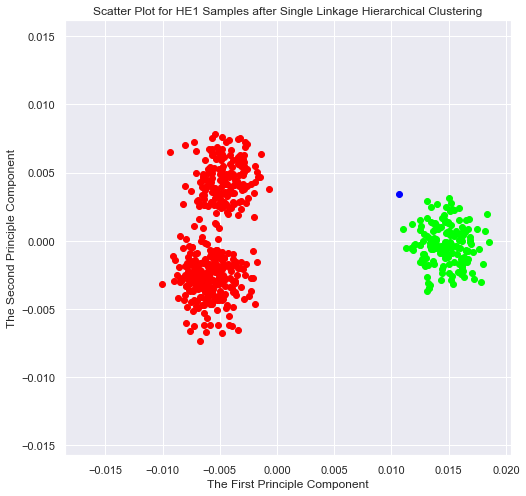

In [36]:
# generate single linkage Hierarchical clustering for HE1 graph
H1single=[[],[],[]]
for i in range(len(dataH1)):
    H1single[clusH1s.labels_[i]].append(hierH1[i])
plt.figure(figsize=(8,8))
plt.scatter(np.array(H1single[0])[:,0],np.array(H1single[0])[:,1],c='#FF0000')
plt.scatter(np.array(H1single[1])[:,0],np.array(H1single[1])[:,1],c='#00FF00')
plt.scatter(np.array(H1single[2])[:,0],np.array(H1single[2])[:,1],c='#0000FF')
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('Scatter Plot for HE1 Samples after Single Linkage Hierarchical Clustering')

plt.show()

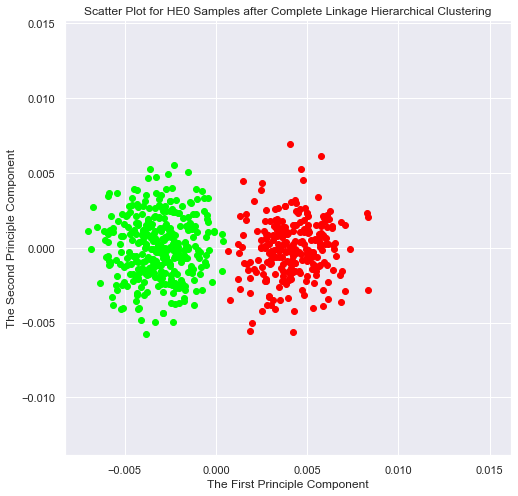

In [37]:
# generate complete linkage Hierarchical clustering for HE0 graph
H0complete=[[],[]]
for i in range(len(dataH0)):
    H0complete[clusH0c.labels_[i]].append(hierH0[i])
plt.figure(figsize=(8,8))
plt.scatter(np.array(H0complete[0])[:,0],np.array(H0complete[0])[:,1],c='#FF0000')
plt.scatter(np.array(H0complete[1])[:,0],np.array(H0complete[1])[:,1],c='#00FF00')
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('Scatter Plot for HE0 Samples after Complete Linkage Hierarchical Clustering')

plt.show()

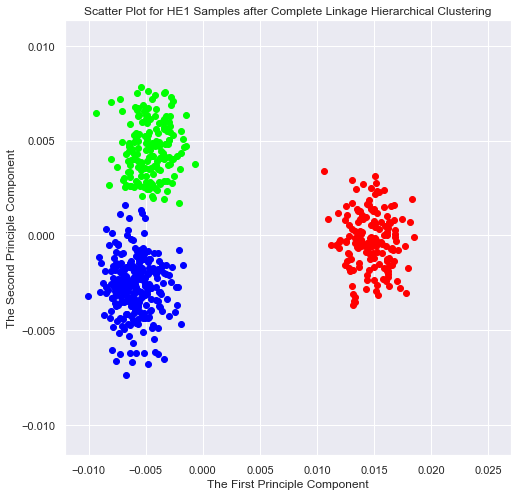

In [38]:
# generate single complete Hierarchical clustering for HE1 graph
H1complete=[[],[],[]]
for i in range(len(dataH1)):
    H1complete[clusH1c.labels_[i]].append(hierH1[i])
plt.figure(figsize=(8,8))
plt.scatter(np.array(H1complete[0])[:,0],np.array(H1complete[0])[:,1],c='#FF0000')
plt.scatter(np.array(H1complete[1])[:,0],np.array(H1complete[1])[:,1],c='#00FF00')
plt.scatter(np.array(H1complete[2])[:,0],np.array(H1complete[2])[:,1],c='#0000FF')
plt.xlabel('The First Principle Component')
plt.ylabel('The Second Principle Component')
plt.title('Scatter Plot for HE1 Samples after Complete Linkage Hierarchical Clustering')

plt.show()

### d. Single vs Complete Link Hierarchical Clustering

Single link and Complete link both keep merge two set of data with closest DISTANCE among all pairs of two sets. Single link defines the DISTANCE as two closest data from each of the set among all pairs of such two data. This makes clusters will spread through a group of close data regardless of its shape. While complete link defines the DISTANCE as two farthest data from each of the set among all pairs of such two data. This will make all clusters has a regular compact shape, ideally a circle.

For our graph. After PCA dimension reduction, it is obvious that the two potential clusters for data H0 and three potential clusters for data H1, has a compact shape, but the two cluster in H0 and the two cluster at left side of H1 has override parts. So single link will let the same cluster spread through the override part and merge the different clusters, which we think is bad. While complete link keeps their regular shape and performs clustering as we wished.

$
\text{The difference between the single and complete linkage hierarchical clustering methods is that their ways}\\
\text{to define the distance between two clusters are different. Even though these two methods both start from}\\ 
\text{treating each data point as a cluster and merge two clusters which are most similar (closest) to each other,}\\ 
\text{the single linkage method defines the distance between two clusters as the distance of the closest pair of}\\ 
\text{data objects belonging to different clusters while the complete linkage method defines the distance between}\\ 
\text{two clusters as the distance of the farthest pair of data objects belonging to different clusters.}\\
\ \\
\text{Yes, major differences can be seen from the generated clusters. Specifically, the result from the single linkage}\\ 
\text{method is quite different from the result from the complete linkage method for HE0 data. Besides, the result}\\ 
\text{from the single linkage method is also quite different from the result from the complete linkage method for HE1}\\ 
\text{data. We think that it is the outliers in the data that cause the differences. Since the single linkage method}\\ 
\text{is sensitive to outliers and suffers the chaining effect, the results from the single linkage method will be}\\ 
\text{heavily affected by the outliers in our data. Based on observation, there should be at least one outlier in}\\ 
\text{both the HE0 and HE1 samples, so the performance of the single linkage method is really bad for either the HE0}\\ 
\text{data or the HE1 data. By contrast, the complete linkage method is robust to outliers and prefers spherical}\\ 
\text{clusters, so it performs pretty well for both the HE0 data and the HE1 data.}
$

### e. Comparing Clustering Techniques

$
\text{Intuitively, there should be two clusters in the HE0 data while three clusters in the HE1 data. Except the}\\ 
\text{single linkage hierarchical clustering method, all other methods give really reasonable results. Obtaining}\\ 
\text{reasonable results is expected, because the clusters in the HE0 and the HE1 data are obvious. By contrast,}\\ 
\text{it is the outliers in the HE0 and the HE1 data that cause the unreasonable result from the single linkage}\\ 
\text{hierarchical clustering method. The single linkage hierarchical clustering method is sensitive to outliers,}\\ 
\text{so the outliers in the HE0 and the HE1 data can heavily affect the performance of the single linkage}\\ 
\text{hierarchical clustering method. We select the GMM results for the following analyses.}
$

### f. What do Clusters Represent

### g. Deciding on Number of Clusters

# Task 4: Interpreting Results

## 1. Identify Microbes with Altered Abundance Levels

### a. Determine if each HE1 Subpopulation shows altered abundance levels

#### I use the clustering result generated by the GMM as the subpopulation to do the microbe analysis. For every subpopulation in HE0 and HE1, I will generate a size-149 vector with each element in the vector is the average of the relative aboundance of that particlular microbe in that subpolupation. And I will compare for 6 times (each subpopulation in HE1 compare to HE0) and determine whether there exists a significantly different microbiome than the HE0 samples. 

$
\text{We use the clusters generated by the GMM method as the subpopulations to do the following microbe analysis. For}\\ 
\text{every subpopulation in HE0 and HE1 data, we generate a size-149 vector with each element in the vector is the}\\  
\text{average of the relative aboundance of that particlular microbe in the subpolupation. Then, we compare each}\\  
\text{subpopulation in HE1 to each subpopulation in HE0, six comparisons in total, to determine if each HE1 subpopulation}\\  
\text{shows a significantly different microbiome than the HE0 samples.}
$

In [39]:
from sklearn.decomposition import PCA
#non-patient set name: data_gn_HE0
#patient set name: data_gn_HE1
#get the data
dataH0 = []
dataH1 = []
for i in range(len(data_gn_HE0.columns)):
    dataH0.append(np.array(data_gn_HE0.iloc[:,i]))
for i in range(len(data_gn_HE1.columns)):
    dataH1.append(np.array(data_gn_HE1.iloc[:,i]))
dataH0=np.array(dataH0)
dataH1=np.array(dataH1)
HE0_array=dataH0
HE1_array=dataH1
pca0 = PCA()
pca0.fit(HE0_array)
pca_HE0=pca0.transform(HE0_array)
pca1 = PCA()
pca1.fit(HE1_array)
pca_HE1=pca1.transform(HE1_array)

In [42]:
from sklearn.mixture import GaussianMixture
y_HE0_pred= GaussianMixture(n_components=2, random_state=9).fit_predict(pca_HE0)
y_HE1_pred= GaussianMixture(n_components=3, random_state=9).fit_predict(pca_HE1)
#get the GMM result for HE0 with k=2 and HE1 with k=3

In [ ]:
# basic set up
# divide HE1 samples into three subpopulations
HE1_a=[]
HE1_b=[]
HE1_c=[]

# divide HE0 samples into two subpopulations
HE0_a=[]
HE0_b=[]

# map the clusters in low dimension to the original dimension
for i in range(len(dataH1)):
    if y_HE1_pred[i]==0:#set the cluster with label 0 in HE1 GMM as the HE1_a group
        HE1_a.append(list(dataH1[i]))
    if y_HE1_pred[i]==1:#set the cluster with label 1 in HE1 GMM as the HE1_b group
        HE1_b.append(list(dataH1[i]))
    if y_HE1_pred[i]==2:#set the cluster with label 2 in HE1 GMM as the HE1_c group
        HE1_c.append(list(dataH1[i]))
for i in range(len(dataH0)):
    if y_HE0_pred[i]==0:#set the cluster with label 0 in HE0 GMM as the HE0_a group
        HE0_a.append(list(dataH0[i]))
    if y_HE0_pred[i]==1:#set the cluster with label 1 in HE0 GMM as the HE0_b group
        HE0_b.append(list(dataH0[i]))
        
# calculate the average vector for every high dimension cluster
vector_1a=np.zeros(149)
vector_1b=np.zeros(149)
vector_1c=np.zeros(149)
vector_0a=np.zeros(149)
vector_0b=np.zeros(149)

for j in range(len(HE1_a)):
    for i in range(149):
        vector_1a[i]+=HE1_a[j][i]
vector_1a=vector_1a/len(HE1_a)

for j in range(len(HE1_b)):
    for i in range(149):
        vector_1b[i]+=HE1_b[j][i]
vector_1b=vector_1b/len(HE1_b)
    
for j in range(len(HE1_c)):
    for i in range(149):
        vector_1c[i]+=HE1_c[j][i]
vector_1c=vector_1c/len(HE1_c)

for j in range(len(HE0_a)):
    for i in range(149):
        vector_0a[i]+=HE0_a[j][i]
vector_0a=vector_0a/len(HE0_a)

for j in range(len(HE0_b)):
    for i in range(149):
        vector_0b[i]+=HE0_b[j][i]
vector_0b=vector_0b/len(HE0_b)

$
\text{In the comparison, we make use of percentage difference to compare relative abundance. In each comparison, we}\\ 
\text{calculate the percentage difference between the two compared subpopulations for each microbe, forming a size-149}\\  
\text{percentage difference vector.}\\ 
$

In [77]:
# generate six comparison vector (the percentage difference between two subpopulations)
# calculation of percentage difference: 100 * (a-b) / a
p_1a0a = np.zeros(149)
p_1a0b = np.zeros(149)
p_1b0a = np.zeros(149)
p_1b0b = np.zeros(149)
p_1c0a = np.zeros(149)
p_1c0b = np.zeros(149)

# generate percentage difference vectors
for i in range(149):
    p_1a0a[i] = abs((vector_1a[i]-vector_0a[i])/(vector_1a[i]))
    p_1a0b[i] = abs((vector_1a[i]-vector_0b[i])/(vector_1a[i]))
    p_1b0a[i] = abs((vector_1b[i]-vector_0a[i])/(vector_1b[i]))
    p_1b0b[i] = abs((vector_1b[i]-vector_0b[i])/(vector_1b[i]))
    p_1c0a[i] = abs((vector_1c[i]-vector_0a[i])/(vector_1c[i]))
    p_1c0b[i] = abs((vector_1c[i]-vector_0b[i])/(vector_1c[i]))


print('Percentage difference of relative abundance for each microbe between HE1_a and HE0_a:\n',p_1a0a)

print('\nPercentage difference of relative abundance for each microbe between HE1_a and HE0_b:\n',p_1a0b)

print('\nPercentage difference of relative abundance for each microbe between HE1_b and HE0_a:\n',p_1b0a)

print('\nPercentage difference of relative abundance for each microbe between HE1_b and HE0_b:\n',p_1b0b)

print('\nPercentage difference of relative abundance for each microbe between HE1_c and HE0_a:\n',p_1c0a)

print('\nPercentage difference of relative abundance for each microbe between HE1_c and HE0_b:\n',p_1c0b)

Percentage difference of relative abundance for each microbe between HE1_a and HE0_a:
 [0.07610917 0.08742597 0.0348763  0.05238796 0.05265624 0.00246012
 0.10403501 0.04409489 0.05451813 0.06421276 0.0288407  0.01623928
 0.04227273 0.03904473 0.11223366 0.03389388 0.01651355 0.06661319
 0.05977902 0.05402432 0.02198845 0.05459977 0.03241099 0.05091939
 0.07914745 0.04857425 0.10143268 0.04360544 0.04776801 0.01803329
 0.01368461 0.0234161  0.03319093 0.08312101 0.14288695 0.07567837
 0.10176396 0.04906802 0.0987848  0.02062519 0.07633521 0.03029161
 0.08331597 0.12884578 0.06041552 0.01726406 0.10380788 0.06245474
 0.03488075 0.10649119 0.10957642 0.04309307 0.06030916 0.06979018
 0.06277405 0.06331559 0.05747718 0.05121799 0.16603617 0.02635894
 0.03795405 0.04440933 0.13919795 0.01078908 0.09323298 0.03142276
 0.03144265 0.04387524 0.06885092 0.09469293 0.06811324 0.10505598
 0.05130515 0.0461631  0.09708869 0.0732564  0.14928076 0.12545686
 0.00493329 0.04228401 0.05288305 0.030945

To get an intuition of the difference of the microbiome between subpopulations, we must get rid of the influence of some small percentage differences. Thus, we set a threshold to eliminate the effect of the small percentage differences. In other words, we do not consider the percentage diference smaller than or equal to 15% as a sign for microbial relative abundance difference. We only consider the percentage difference greater than 15% as a sign for microbial relative aboundance difference. Then, we count the number of microbes that have a significantly altered abundance for each comparison.

In [58]:
# detect for the combination of subpopulations that has significant difference of microbiome 
count_p_1a0a = 0
count_p_1a0b = 0
count_p_1b0a = 0
count_p_1b0b = 0
count_p_1c0a = 0
count_p_1c0b = 0


for i in range(149):
    if p_1a0a[i]>0.15 :
        count_p_1a0a += 1
    if p_1a0b[i]>0.15 :
        count_p_1a0b += 1
    if p_1b0a[i]>0.15:
        count_p_1b0a += 1
    if p_1b0b[i]>0.15:
        count_p_1b0b += 1
    if p_1c0a[i]>0.15:
        count_p_1c0a += 1
    if p_1c0b[i]>0.15:
        count_p_1c0b += 1
        
print("at 0.15 level:")
print('\nHE1_a and HE0_a:',
      '\nNumber of significantly different microbiome:', count_p_1a0a,
      '\n\nHE1_a and HE0_b:',
      '\nNumber of significantly different microbiome:', count_p_1a0b,
      '\n\nHE1_b and HE0_a:',
      '\nNumber of significantly different microbiome:', count_p_1b0a,
      '\n\nHE1_b and HE0_b:',
      '\nNumber of significantly different microbiome:', count_p_1b0b,
      '\n\nHE1_c and HE0_a:',
      '\nNumber of significantly different microbiome:', count_p_1c0a,
      '\n\nHE1_c and HE0_b:',
      '\nNumber of significantly different microbiome:', count_p_1c0b)


at 0.15 level:

HE1_a and HE0_a: 
Number of significantly different microbiome: 2 

HE1_a and HE0_b: 
Number of significantly different microbiome: 0 

HE1_b and HE0_a: 
Number of significantly different microbiome: 16 

HE1_b and HE0_b: 
Number of significantly different microbiome: 26 

HE1_c and HE0_a: 
Number of significantly different microbiome: 0 

HE1_c and HE0_b: 
Number of significantly different microbiome: 6


#### from tne score and the percentage difference vector, we can see that the HE1_a and HE0_b, HE1_b and HE0_a, HE1_b and HE0_b,HE1_c and HE0_a has a significant difference in microbiome.

$
\textbf{Criteria:}\\
\text{1) If the percentage difference is larger than 15%, we consider the corresponding microbe to have a significantly altered abundance.}\\
\text{2) If more than five microbes have a significantly altered abundance, we consider the microbiome to be significantly different.}\\
\ \\
\text{Based on our analysis and the criteria we define, we obtain the following information.}\\
\bullet \text{HE1_a subpopulation has no significantly different microbiome than the HE0_a or HE0_b subpopulations.}\\
\bullet \text{HE1_b subpopulation has a significantly different microbiome than both the HE0_a and HE0_b subpopulations.}\\
\bullet \text{HE1_c subpopulation has a significantly different microbiome only than the HE0_b subpopulation.}\\
$

### b. Identify Most Similar HE0 Clusters to Affected HE1 Clusters

#### from tne score and the percentage difference vector, we can see that the HE1_a and HE0_a, HE1_c and HE0_b has the most similarity in microbiome. And HE1_b are quite different to both the clusters of HE0 samples, but it is closer to HE0_b. Since when we increase the threshold of absolute percentage difference from .05 to .10, the sum of the difference between HE1_b and HE0_b  drops significantly but HE0_a has no change.

$
\text{For this problem, we can directly make use of the results from Task 4.1.a, because the decision process is the same.}\\
\bullet \text{For HE1_b subpopulation, it is most similar to HE0_a subpopulation, because there are 16 microbes that have a}\\ 
\ \ \text{significantly altered abundance between HE1_b and HE0_a subpopulations while 26 microbes that have a significantly}\\ 
\ \ \text{altered abundance between HE1_b and HE0_b subpopulations.}\\
\bullet \text{For HE1_c subpopulation, it is most similar to HE0_a subpopulation, because there are no microbes that have a}\\ 
\ \ \text{significantly altered abundance between HE1_c and HE0_a subpopulations while 6 microbes that have a significantly}\\
\ \ \text{altered abundance between HE1_c and HE0_b subpopulations.}
$

### c. Identify Microbes with Significantly Altered Relative Abundance

In [73]:
alpha = 0.0000025

# compare HE1_b with HE0_a
p_val_mic = []
mic_index_1 = []
HE1_b_arr = np.array(HE1_b)
HE0_a_arr = np.array(HE0_a)

# apply KS test
for i in range(HE1_b_arr.shape[1]):
    st_value,p_value = st.ks_2samp(HE1_b_arr[:,i],  HE0_a_arr[:,i])
    p_val_mic.append(p_value)

# look for microbe index
for i in range(len(p_val_mic)):
    if p_val_mic[i] <= alpha: # significantly altered
        mic_index_1.append(i)

print('Comparing HE1_b and HE0_a subpopulations')
print('Identify',len(mic_index_1),'microbes with significantly altered abundance:\n')
for i in mic_index_1:
    print(data_gn_HE0.index[i])    

Comparing HE1_b and HE0_a subpopulations
Identify 14 microbes with significantly altered abundance:

Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae
Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae
Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae
Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae
Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI
Firmicutes_Bacilli_Lactobacillales_Lactobacillaceae
Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae
Parvarchaeota_Candidatus Parvarchaeum_Candidatus Parvarchaeum_Candidatus Parvarchaeum
Proteobacteria_Alphaproteobacteria_Rhizobiales_Brucellaceae
Proteobacteria_Alphaproteobacteria_Rhizobiales_Hyphomicrobiaceae
Proteobacteria_Alphaproteobacteria_Rhizobiales_Rhizobiaceae
Proteobacteria_Alphaproteobacteria_SAR11_SAR11
Proteobacteria_Betaproteobacteria_Burkholderiales_Burkholderiaceae
Proteobacteria_Gammaproteobacteria_Orbales_Orbaceae


In [72]:
# compare HE1_c with HE0_a
p_val_mic = []
mic_index_2 = []
HE1_c_arr = np.array(HE1_c)
HE0_a_arr = np.array(HE0_a)

# apply KS test
for i in range(HE1_c_arr.shape[1]):
    st_value,p_value = st.ks_2samp(HE1_c_arr[:,i],  HE0_a_arr[:,i])
    p_val_mic.append(p_value)

# look for microbe index
for i in range(len(p_val_mic)):
    if p_val_mic[i] <= alpha: # significantly altered
        mic_index_2.append(i)

print('Comparing HE1_c and HE0_a subpopulations')
print('Identify',len(mic_index_2),'microbes with significantly altered abundance:\n')
for i in mic_index_2:
    print(data_gn_HE0.index[i])

Comparing HE1_c and HE0_a subpopulations
Identify 0 microbes with significantly altered abundance:



## 2. Identify How Abundance Changes

### a. Microbes which increase and decrease

In [76]:
inc = []
dec = []

for i in mic_index_1:
    if 0 < vector_1b[i] - vector_0a[i]:
        inc.append(data_gn_HE0.index[i])
    else:
        dec.append(data_gn_HE0.index[i])
        
print('Microbes that show an increase\n')
for i in inc:
    print(i)
    
print('\nMicrobes that show an decrease\n')
for i in dec:
    print(i)

Microbes that show an increase

Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae
Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae
Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae
Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae
Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI
Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae
Parvarchaeota_Candidatus Parvarchaeum_Candidatus Parvarchaeum_Candidatus Parvarchaeum
Proteobacteria_Alphaproteobacteria_Rhizobiales_Brucellaceae
Proteobacteria_Alphaproteobacteria_Rhizobiales_Hyphomicrobiaceae
Proteobacteria_Alphaproteobacteria_SAR11_SAR11

Microbes that show an decrease

Firmicutes_Bacilli_Lactobacillales_Lactobacillaceae
Proteobacteria_Alphaproteobacteria_Rhizobiales_Rhizobiaceae
Proteobacteria_Betaproteobacteria_Burkholderiales_Burkholderiaceae
Proteobacteria_Gammaproteobacteria_Orbales_Orbaceae


### b. Biological Relations

$
\bullet \text{Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae and Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae}\\ 
\ \ \text{belong to Actinobacteria.}\\
\bullet \text{Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI and Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae belongs to}\\ 
\ \ \text{Firmicutes.}\\
\bullet \text{Proteobacteria_Alphaproteobacteria_Rhizobiales_Brucellaceae, Proteobacteria_Alphaproteobacteria_Rhizobiales_Hyphomicrobiaceae,}\\
\ \ \text{Proteobacteria_Alphaproteobacteria_SAR11_SAR11, Proteobacteria_Alphaproteobacteria_Rhizobiales_Rhizobiaceae,}\\
\ \ \text{Proteobacteria_Betaproteobacteria_Burkholderiales_Burkholderiaceae, and Proteobacteria_Gammaproteobacteria_Orbales_Orbaceae belong to}\\
\ \ \text{Proteobacteria}
$